In [3]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import timedelta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt


In [120]:
us_cities_states = pd.read_csv('/Users/mattguymon/Downloads/US/US.txt')

In [ ]:
us_cities_states.to_csv('/Users/mattguymon/Downloads/US/US.txt', sep=',', index=False)

# Scrape Using selinium

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:

from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

options = webdriver.ChromeOptions()
options.add_argument('headless')
options.page_load_strategy='none'
chrome_path = ChromeDriverManager().install()
chrome_service = Service(chrome_path)
driver = Chrome(options=options, service=chrome_service)
driver.implicitly_wait(5)

# event and place are read in from a csv file and used to construct the target URL
url = 'https://runsignup.com/Race/Results/146129#resultSetId-447468;perpage:5000'
driver.get(url)

In [5]:
table = driver.find_element(By.ID, 'resultsTable')

In [6]:
print(table)

<selenium.webdriver.remote.webelement.WebElement (session="daa6dbc4e8cfb0e4aa11c1d10f8906a1", element="f.2C60886FE024F64584DF7BC81FD55613.d.DBBC66FB5B80D442A85EADB4C3E5F0A5.e.6")>


In [7]:
rows = table.find_elements(By.TAG_NAME, "tr")

In [8]:
rows

[<selenium.webdriver.remote.webelement.WebElement (session="daa6dbc4e8cfb0e4aa11c1d10f8906a1", element="f.2C60886FE024F64584DF7BC81FD55613.d.DBBC66FB5B80D442A85EADB4C3E5F0A5.e.24")>,
 <selenium.webdriver.remote.webelement.WebElement (session="daa6dbc4e8cfb0e4aa11c1d10f8906a1", element="f.2C60886FE024F64584DF7BC81FD55613.d.DBBC66FB5B80D442A85EADB4C3E5F0A5.e.25")>,
 <selenium.webdriver.remote.webelement.WebElement (session="daa6dbc4e8cfb0e4aa11c1d10f8906a1", element="f.2C60886FE024F64584DF7BC81FD55613.d.DBBC66FB5B80D442A85EADB4C3E5F0A5.e.26")>,
 <selenium.webdriver.remote.webelement.WebElement (session="daa6dbc4e8cfb0e4aa11c1d10f8906a1", element="f.2C60886FE024F64584DF7BC81FD55613.d.DBBC66FB5B80D442A85EADB4C3E5F0A5.e.27")>,
 <selenium.webdriver.remote.webelement.WebElement (session="daa6dbc4e8cfb0e4aa11c1d10f8906a1", element="f.2C60886FE024F64584DF7BC81FD55613.d.DBBC66FB5B80D442A85EADB4C3E5F0A5.e.28")>,
 <selenium.webdriver.remote.webelement.WebElement (session="daa6dbc4e8cfb0e4aa11c1d10

In [9]:
# Initialize empty lists to store data
data = []

# Extract data from each row
for row in rows:
    cells = row.find_elements(By.TAG_NAME, "td")
    if len(cells) >= 2:  # Assuming each row has at least two cells
        # Extract data from cells and append to the data list
        row_data = [cell.text for cell in cells]
        data.append(row_data)


In [10]:
# Create a dataframe from the extracted data
df = pd.DataFrame(data)

# Close the WebDriver
#driver.quit()

# Display the dataframe
#print(df)

In [11]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,2484,M\nMatthew\nHernandez,M,SAN ANTONIO,US,27:25,5:29,4,54:40,5:28,4,1:21:54,5:28,3,1:49:02,5:27,3,2:22:31,2:22:30,5:26,25,85.8,1,M Open
1,2,2494,A\nAlexander\nHelmuth,M,EUGENE,US,26:06,5:13,2,52:35,5:16,2,1:19:30,5:18,2,1:48:07,5:24,2,2:22:46,2:22:45,5:27,24,85.6,2,M Open
2,3,2477,P\nPeter\nBorger,M,MALVERN,US,26:11,5:14,3,52:34,5:15,1,1:18:54,5:16,1,1:46:03,5:18,1,2:22:51,2:22:49,5:27,24,85.6,3,M Open
3,4,2419,J\nJoe\nMaguire,M,Philadelphia,US,27:40,5:32,6,55:02,5:30,5,1:22:58,5:32,4,1:50:42,5:32,4,2:23:46,2:23:44,5:29,26,85.0,1,M 25-29
4,5,2411,B\nBlake\nMedhaug,M,Seattle,US,27:31,5:30,5,55:02,5:30,6,1:22:58,5:32,5,1:50:46,5:32,5,2:25:26,2:25:25,5:33,36,84.8,1,M 35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4860,C\nCatherine\nPisacano,F,NEW YORK,US,50:00,10:00,2400,1:37:45,9:47,2343,2:25:30,9:42,2200,3:14:11,9:43,2130,4:19:02,4:13:09,9:40,44,56.1,99,F 40-44
1996,1997,5045,K\nKatie\nPrice,F,Portland,US,48:14,9:39,2246,1:35:17,9:32,2226,2:22:54,9:32,2135,3:10:39,9:32,2065,4:19:15,4:13:13,9:40,32,53.2,168,F 30-34
1997,1998,5247,C\nChris\nDompier,M,Eugene,US,50:21,10:04,2427,1:35:41,9:34,2247,2:21:07,9:24,2081,3:10:22,9:31,2056,4:20:20,4:13:13,9:40,21,48.3,132,M 20-24
1998,1999,4800,G\nGrace\nLaskowski,F,PORTLAND,US,48:15,9:39,2247,1:35:15,9:32,2225,2:22:53,9:32,2133,3:10:40,9:32,2068,4:19:16,4:13:13,9:40,33,53.2,169,F 30-34


In [12]:
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.page_load_strategy='none'
chrome_path = ChromeDriverManager().install()
chrome_service = Service(chrome_path)
driver = Chrome(options=options, service=chrome_service)
driver.implicitly_wait(5)

In [13]:
# Open the webpage containing the additional table
additional_url = "https://runsignup.com/Race/Results/146129#resultSetId-447468;page:2;perpage:2000"
driver.get(additional_url)

# Find the additional table element by id
additional_table = driver.find_element(By.ID, 'resultsTable')

# Extract rows from the additional table
additional_rows = additional_table.find_elements(By.TAG_NAME, "tr")

# Extract data from each row of the additional table and append to the existing DataFrame
for row in additional_rows:
    cells = row.find_elements(By.TAG_NAME, "td")
    if len(cells) >= 2:  # Assuming each row has at least two cells
        # Extract data from cells
        row_data = [cell.text for cell in cells]
        # Append data to the existing DataFrame
        df.loc[len(df)] = row_data



In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1,2484,M\nMatthew\nHernandez,M,SAN ANTONIO,US,27:25,5:29,4,54:40,5:28,4,1:21:54,5:28,3,1:49:02,5:27,3,2:22:31,2:22:30,5:26,25,85.8,1,M Open
1,2,2494,A\nAlexander\nHelmuth,M,EUGENE,US,26:06,5:13,2,52:35,5:16,2,1:19:30,5:18,2,1:48:07,5:24,2,2:22:46,2:22:45,5:27,24,85.6,2,M Open
2,3,2477,P\nPeter\nBorger,M,MALVERN,US,26:11,5:14,3,52:34,5:15,1,1:18:54,5:16,1,1:46:03,5:18,1,2:22:51,2:22:49,5:27,24,85.6,3,M Open
3,4,2419,J\nJoe\nMaguire,M,Philadelphia,US,27:40,5:32,6,55:02,5:30,5,1:22:58,5:32,4,1:50:42,5:32,4,2:23:46,2:23:44,5:29,26,85.0,1,M 25-29
4,5,2411,B\nBlake\nMedhaug,M,Seattle,US,27:31,5:30,5,55:02,5:30,6,1:22:58,5:32,5,1:50:46,5:32,5,2:25:26,2:25:25,5:33,36,84.8,1,M 35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,Q\nQuinn\nMichalek,M,Eugene,US,45:55,9:11,1986,1:31:16,9:08,2015,,,,,,,DNF,DNF,,45,,,
3032,3033,5483,d\ndean\nbooras,M,Concord,US,,,,1:42:17,10:14,2494,,,,,,,DNF,DNF,,41,,,
3033,3034,2525,J\nJacob\nWaufle,M,EUGENE,US,43:43,8:45,1645,,,,,,,,,,DNF,DNF,,21,,,
3034,3035,2402,H\nHillary\nShaw,F,Seattle,US,59:40,11:56,2914,,,,,,,,,,DNF,DNF,,40,,,


In [15]:
# Open the webpage containing the additional table
additional_url = "https://runsignup.com/Race/Results/146129#resultSetId-447468;page:2;perpage:2000"
driver.get(additional_url)

# Find the additional table element by id
additional_table = driver.find_element(By.ID, 'resultsTable')

# Extract headers from the first row of the additional table
header_row = additional_table.find_element(By.TAG_NAME, "tr")
new_headers = [header.text for header in header_row.find_elements(By.TAG_NAME, "th")]

# Update the DataFrame with new headers
df.columns = new_headers

# Display the DataFrame to verify the changes
df

,Place,Bib,Name,Gender,City,Country,5 Mile,5 Mile\nPace,5 Mile\nPlace,10 Mile,10 Mile\nPace,10 Mile\nPlace,15 Mile,15 Mile\nPace,15 Mile\nPlace,20 Mile,20 Mile\nPace,20 Mile\nPlace,Clock\nTime,Chip\nTime,Pace,Age,Age\nPercentage,Division\nPlace,Division
0,1,2484,M\nMatthew\nHernandez,M,SAN ANTONIO,US,27:25,5:29,4,54:40,5:28,4,1:21:54,5:28,3,1:49:02,5:27,3,2:22:31,2:22:30,5:26,25,85.8,1,M Open
1,2,2494,A\nAlexander\nHelmuth,M,EUGENE,US,26:06,5:13,2,52:35,5:16,2,1:19:30,5:18,2,1:48:07,5:24,2,2:22:46,2:22:45,5:27,24,85.6,2,M Open
2,3,2477,P\nPeter\nBorger,M,MALVERN,US,26:11,5:14,3,52:34,5:15,1,1:18:54,5:16,1,1:46:03,5:18,1,2:22:51,2:22:49,5:27,24,85.6,3,M Open
3,4,2419,J\nJoe\nMaguire,M,Philadelphia,US,27:40,5:32,6,55:02,5:30,5,1:22:58,5:32,4,1:50:42,5:32,4,2:23:46,2:23:44,5:29,26,85.0,1,M 25-29
4,5,2411,B\nBlake\nMedhaug,M,Seattle,US,27:31,5:30,5,55:02,5:30,6,1:22:58,5:32,5,1:50:46,5:32,5,2:25:26,2:25:25,5:33,36,84.8,1,M 35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,Q\nQuinn\nMichalek,M,Eugene,US,45:55,9:11,1986,1:31:16,9:08,2015,,,,,,,DNF,DNF,,45,,,
3032,3033,5483,d\ndean\nbooras,M,Concord,US,,,,1:42:17,10:14,2494,,,,,,,DNF,DNF,,41,,,
3033,3034,2525,J\nJacob\nWaufle,M,EUGENE,US,43:43,8:45,1645,,,,,,,,,,DNF,DNF,,21,,,
3034,3035,2402,H\nHillary\nShaw,F,Seattle,US,59:40,11:56,2914,,,,,,,,,,DNF,DNF,,40,,,


# Data Cleaning

In [16]:
df['Name'] = df['Name'].str.replace('\n', '')
df['Name'] = df['Name'].str[1:]

df

,Place,Bib,Name,Gender,City,Country,5 Mile,5 Mile\nPace,5 Mile\nPlace,10 Mile,10 Mile\nPace,10 Mile\nPlace,15 Mile,15 Mile\nPace,15 Mile\nPlace,20 Mile,20 Mile\nPace,20 Mile\nPlace,Clock\nTime,Chip\nTime,Pace,Age,Age\nPercentage,Division\nPlace,Division
0,1,2484,MatthewHernandez,M,SAN ANTONIO,US,27:25,5:29,4,54:40,5:28,4,1:21:54,5:28,3,1:49:02,5:27,3,2:22:31,2:22:30,5:26,25,85.8,1,M Open
1,2,2494,AlexanderHelmuth,M,EUGENE,US,26:06,5:13,2,52:35,5:16,2,1:19:30,5:18,2,1:48:07,5:24,2,2:22:46,2:22:45,5:27,24,85.6,2,M Open
2,3,2477,PeterBorger,M,MALVERN,US,26:11,5:14,3,52:34,5:15,1,1:18:54,5:16,1,1:46:03,5:18,1,2:22:51,2:22:49,5:27,24,85.6,3,M Open
3,4,2419,JoeMaguire,M,Philadelphia,US,27:40,5:32,6,55:02,5:30,5,1:22:58,5:32,4,1:50:42,5:32,4,2:23:46,2:23:44,5:29,26,85.0,1,M 25-29
4,5,2411,BlakeMedhaug,M,Seattle,US,27:31,5:30,5,55:02,5:30,6,1:22:58,5:32,5,1:50:46,5:32,5,2:25:26,2:25:25,5:33,36,84.8,1,M 35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,QuinnMichalek,M,Eugene,US,45:55,9:11,1986,1:31:16,9:08,2015,,,,,,,DNF,DNF,,45,,,
3032,3033,5483,deanbooras,M,Concord,US,,,,1:42:17,10:14,2494,,,,,,,DNF,DNF,,41,,,
3033,3034,2525,JacobWaufle,M,EUGENE,US,43:43,8:45,1645,,,,,,,,,,DNF,DNF,,21,,,
3034,3035,2402,HillaryShaw,F,Seattle,US,59:40,11:56,2914,,,,,,,,,,DNF,DNF,,40,,,


In [91]:
df.loc[df['Age'] >= 75]

,Place,Bib,Name,Gender,City,Country,5_Mile,5_Mile_Pace,5_Mile_Place,10_Mile,10_Mile_Pace,10_Mile_Place,15_Mile,15_Mile_Pace,15_Mile_Place,20_Mile,20_Mile_Pace,20_Mile_Place,Clock_Time,Chip_Time,Pace,Age,Age_Percentage,Division_Place,Division,State,chip_time_delta,hours
1640,1641,4246,RoslynSmith,F,COMOX,CA,44:37,8:55,1779.0,1:29:14,8:55,1869.0,2:14:10,8:57,1828.0,2:59:31,8:59,1788.0,3:58:51,3:55:07,8:58,75.0,93.8,1.0,F 75-79,CANADA,0 days 03:55:07,0 days 00:03:55.116666666
2678,2679,5003,FrankSwisher,M,EAGLE POINT,US,55:42,11:08,2782.0,1:51:58,11:12,2798.0,2:49:23,11:18,2707.0,3:49:21,11:28,2703.0,5:14:12,5:06:37,11:42,75.0,57.8,1.0,M 75-79,OREGON,0 days 05:06:37,0 days 00:05:06.616666666
2723,2724,5276,AlbertTremblett,M,BURNABY,CA,56:46,11:21,2832.0,1:52:54,11:17,2813.0,2:50:48,11:23,2726.0,3:51:49,11:35,2729.0,5:19:44,5:11:48,11:54,76.0,57.8,2.0,M 75-79,CANADA,0 days 05:11:48,0 days 00:05:11.800000
2776,2777,4629,StanfordMorris,M,ALBANY,US,53:03,10:37,2612.0,1:46:49,10:41,2659.0,2:46:02,11:04,2656.0,3:54:21,11:43,2756.0,5:27:33,5:20:47,12:15,75.0,55.3,3.0,M 75-79,NEW YORK,0 days 05:20:47,0 days 00:05:20.783333333
2836,2837,5652,TomKelleher,M,PORTLAND,US,1:03:41,12:44,2989.0,2:07:21,12:44,2977.0,3:11:20,12:45,2890.0,4:15:36,12:47,2885.0,5:42:34,5:34:19,12:46,77.0,54.9,4.0,M 75-79,OREGON,0 days 05:34:19,0 days 00:05:34.316666666
2861,2862,5493,andrzejjonca,M,BEAVERTON,US,58:15,11:39,2884.0,1:54:24,11:26,2834.0,2:52:56,11:32,2752.0,4:02:28,12:07,2808.0,5:46:44,5:39:42,12:58,77.0,54.1,5.0,M 75-79,OREGON,0 days 05:39:42,0 days 00:05:39.700000
2993,2994,5458,steveboone,M,HUMBLE,US,1:07:50,13:34,3015.0,2:18:58,13:54,3010.0,3:36:54,14:28,2949.0,5:17:33,15:53,2994.0,7:16:36,7:08:41,16:22,75.0,41.4,6.0,M 75-79,TEXAS,0 days 07:08:41,0 days 00:07:08.683333333


In [6]:
df.columns = df.columns.str.replace(' ','_').str.replace('\n','_')

## Read Cleaned data to CSV

In [8]:
df.to_csv('/Users/mattguymon/Desktop/DataViz Projects/Eugene_Marathon_Results_2024_fileRaw.csv', index=False)

In [45]:
df

,Place,Bib,Name,Gender,City,Country,5_Mile,5_Mile_Pace,5_Mile_Place,10_Mile,10_Mile_Pace,10_Mile_Place,15_Mile,15_Mile_Pace,15_Mile_Place,20_Mile,20_Mile_Pace,20_Mile_Place,Clock_Time,Chip_Time,Pace,Age,Age_Percentage,Division_Place,Division
0,1,2484,MatthewHernandez,M,SAN ANTONIO,US,27:25,5:29,4.0,54:40,5:28,4.0,1:21:54,5:28,3.0,1:49:02,5:27,3.0,2:22:31,2:22:30,5:26,25.0,85.8,1.0,M Open
1,2,2494,AlexanderHelmuth,M,EUGENE,US,26:06,5:13,2.0,52:35,5:16,2.0,1:19:30,5:18,2.0,1:48:07,5:24,2.0,2:22:46,2:22:45,5:27,24.0,85.6,2.0,M Open
2,3,2477,PeterBorger,M,MALVERN,US,26:11,5:14,3.0,52:34,5:15,1.0,1:18:54,5:16,1.0,1:46:03,5:18,1.0,2:22:51,2:22:49,5:27,24.0,85.6,3.0,M Open
3,4,2419,JoeMaguire,M,Philadelphia,US,27:40,5:32,6.0,55:02,5:30,5.0,1:22:58,5:32,4.0,1:50:42,5:32,4.0,2:23:46,2:23:44,5:29,26.0,85.0,1.0,M 25-29
4,5,2411,BlakeMedhaug,M,Seattle,US,27:31,5:30,5.0,55:02,5:30,6.0,1:22:58,5:32,5.0,1:50:46,5:32,5.0,2:25:26,2:25:25,5:33,36.0,84.8,1.0,M 35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,QuinnMichalek,M,Eugene,US,45:55,9:11,1986.0,1:31:16,9:08,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,DNF,DNF,NaN,45.0,NaN,NaN,NaN
3032,3033,5483,deanbooras,M,Concord,US,NaN,NaN,NaN,1:42:17,10:14,2494.0,NaN,NaN,NaN,NaN,NaN,NaN,DNF,DNF,NaN,41.0,NaN,NaN,NaN
3033,3034,2525,JacobWaufle,M,EUGENE,US,43:43,8:45,1645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNF,DNF,NaN,21.0,NaN,NaN,NaN
3034,3035,2402,HillaryShaw,F,Seattle,US,59:40,11:56,2914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNF,DNF,NaN,40.0,NaN,NaN,NaN


In [7]:
df.dtypes

Place                int64
Bib                  int64
Name                object
Gender              object
City                object
Country             object
5 Mile              object
5 Mile\nPace        object
5 Mile\nPlace      float64
10 Mile             object
10 Mile\nPace       object
10 Mile\nPlace     float64
15 Mile             object
15 Mile\nPace       object
15 Mile\nPlace     float64
20 Mile             object
20 Mile\nPace       object
20 Mile\nPlace     float64
Clock\nTime         object
Chip\nTime          object
Pace                object
Age                float64
Age\nPercentage    float64
Division\nPlace    float64
Division            object
dtype: object

I need to assign proper datatypes

In [11]:
columns_to_convert = ['5_Mile', '5_Mile_Pace', '5_Mile_Place','10_Mile','10 Mile_Pace','10 Mile_Place','15_Mile','15_Mile_Pace','15_Mile_Place','20_Mile','20_Mile_Pace','20_Mile_Place','Clock_Time','Chip_Time','Pace']
time_delta_cols = ['5_Mile', '5 Mile_Pace','10_Mile','10_Mile_Pace','15_Mile','15_Mile_Pace','20_Mile','20_Mile_Pace','Clock_Time','Chip_Time','Pace']


#df[columns_to_convert] = pd.to_datetime.time(df[columns_to_convert])

In [108]:
df.describe()

,Place,Bib,5_Mile_Place,10_Mile_Place,15_Mile_Place,20_Mile_Place,Age,Age_Percentage,Division_Place,chip_time_delta,hours
count,3036.000000,3036.000000,3033.000000,3023.000000,2955.000000,2995.000000,3035.000000,2985.000000,2995.000000,2995,2995.000000
mean,1518.500000,3758.667984,1517.000000,1512.000000,1478.000000,1498.000000,36.156178,57.772429,106.400334,0 days 03:58:09.920200333,3.969409
std,876.562034,1356.175769,875.696009,872.809258,853.179348,864.726354,11.087475,10.773663,84.353273,0 days 00:50:44.171207184,0.845699
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,29.000000,1.000000,0 days 02:22:30,2.380000
25%,759.750000,2996.750000,759.000000,756.500000,739.500000,749.500000,28.000000,49.900000,36.000000,0 days 03:20:30,3.340000
50%,1518.500000,3956.500000,1517.000000,1512.000000,1478.000000,1498.000000,34.000000,58.100000,88.000000,0 days 03:49:17,3.820000
75%,2277.250000,4775.250000,2275.000000,2267.500000,2216.500000,2246.500000,43.000000,66.100000,159.000000,0 days 04:28:36,4.480000
max,3036.000000,6134.000000,3033.000000,3023.000000,2955.000000,2995.000000,77.000000,93.800000,370.000000,0 days 07:37:22,7.620000


In [12]:
# Make a new column that indicated if a runner finished the race

df['Finished'] = np.where(df['Chip_Time'] != 'DNF', 1, 0)

In [11]:
df['20 Mile'].dtype

dtype('O')

In [82]:
df.replace('DNF', np.nan, inplace=True)

In [14]:
df.describe()

,Place,Bib,5_Mile_Place,10_Mile_Place,15_Mile_Place,20_Mile_Place,Age,Age_Percentage,Division_Place,Finished
count,3036.000000,3036.000000,3033.000000,3023.000000,2955.000000,2995.000000,3035.000000,2985.000000,2995.000000,3036.000000
mean,1518.500000,3758.667984,1517.000000,1512.000000,1478.000000,1498.000000,36.156178,57.772429,106.400334,0.986495
std,876.562034,1356.175769,875.696009,872.809258,853.179348,864.726354,11.087475,10.773663,84.353273,0.115441
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,29.000000,1.000000,0.000000
25%,759.750000,2996.750000,759.000000,756.500000,739.500000,749.500000,28.000000,49.900000,36.000000,1.000000
50%,1518.500000,3956.500000,1517.000000,1512.000000,1478.000000,1498.000000,34.000000,58.100000,88.000000,1.000000
75%,2277.250000,4775.250000,2275.000000,2267.500000,2216.500000,2246.500000,43.000000,66.100000,159.000000,1.000000
max,3036.000000,6134.000000,3033.000000,3023.000000,2955.000000,2995.000000,77.000000,93.800000,370.000000,1.000000


In [15]:
df

,Place,Bib,Name,Gender,City,Country,5_Mile,5_Mile_Pace,5_Mile_Place,10_Mile,10_Mile_Pace,10_Mile_Place,15_Mile,15_Mile_Pace,15_Mile_Place,20_Mile,20_Mile_Pace,20_Mile_Place,Clock_Time,Chip_Time,Pace,Age,Age_Percentage,Division_Place,Division,Finished
0,1,2484,MatthewHernandez,M,SAN ANTONIO,US,27:25,5:29,4.0,54:40,5:28,4.0,1:21:54,5:28,3.0,1:49:02,5:27,3.0,2:22:31,2:22:30,5:26,25.0,85.8,1.0,M Open,1
1,2,2494,AlexanderHelmuth,M,EUGENE,US,26:06,5:13,2.0,52:35,5:16,2.0,1:19:30,5:18,2.0,1:48:07,5:24,2.0,2:22:46,2:22:45,5:27,24.0,85.6,2.0,M Open,1
2,3,2477,PeterBorger,M,MALVERN,US,26:11,5:14,3.0,52:34,5:15,1.0,1:18:54,5:16,1.0,1:46:03,5:18,1.0,2:22:51,2:22:49,5:27,24.0,85.6,3.0,M Open,1
3,4,2419,JoeMaguire,M,Philadelphia,US,27:40,5:32,6.0,55:02,5:30,5.0,1:22:58,5:32,4.0,1:50:42,5:32,4.0,2:23:46,2:23:44,5:29,26.0,85.0,1.0,M 25-29,1
4,5,2411,BlakeMedhaug,M,Seattle,US,27:31,5:30,5.0,55:02,5:30,6.0,1:22:58,5:32,5.0,1:50:46,5:32,5.0,2:25:26,2:25:25,5:33,36.0,84.8,1.0,M 35-39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,QuinnMichalek,M,Eugene,US,45:55,9:11,1986.0,1:31:16,9:08,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,0
3032,3033,5483,deanbooras,M,Concord,US,NaN,NaN,NaN,1:42:17,10:14,2494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,0
3033,3034,2525,JacobWaufle,M,EUGENE,US,43:43,8:45,1645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,0
3034,3035,2402,HillaryShaw,F,Seattle,US,59:40,11:56,2914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,0


## Convert pace strings to timedeltas 

In [16]:
# Function to convert hh:mm:ss or mm:ss strings to timedelta objects
def convert_to_timedelta(value):
    if pd.isna(value):  # Check if value is NaN
        return None
    else:
        components = value.split(':')
        if len(components) == 3:
            hours, minutes, seconds = map(int, components)
        else:
            hours = 0
            minutes, seconds = map(int, components)
        return timedelta(hours=hours, minutes=minutes, seconds=seconds)


In [14]:
# Convert string pace cols to duration, which can be treated as a numeric value
#for column in time_delta_cols:
    df[column] = df[column].apply(convert_to_timedelta)


In [83]:
df['chip_time_delta'] = df['Chip_Time'].apply(convert_to_timedelta)

In [84]:
df

,Place,Bib,Name,Gender,City,Country,5_Mile,5_Mile_Pace,5_Mile_Place,10_Mile,10_Mile_Pace,10_Mile_Place,15_Mile,15_Mile_Pace,15_Mile_Place,20_Mile,20_Mile_Pace,20_Mile_Place,Clock_Time,Chip_Time,Pace,Age,Age_Percentage,Division_Place,Division,State,chip_time_delta
0,1,2484,MatthewHernandez,M,SAN ANTONIO,US,27:25,5:29,4.0,54:40,5:28,4.0,1:21:54,5:28,3.0,1:49:02,5:27,3.0,2:22:31,2:22:30,5:26,25.0,85.8,1.0,M Open,TEXAS,0 days 02:22:30
1,2,2494,AlexanderHelmuth,M,EUGENE,US,26:06,5:13,2.0,52:35,5:16,2.0,1:19:30,5:18,2.0,1:48:07,5:24,2.0,2:22:46,2:22:45,5:27,24.0,85.6,2.0,M Open,OREGON,0 days 02:22:45
2,3,2477,PeterBorger,M,MALVERN,US,26:11,5:14,3.0,52:34,5:15,1.0,1:18:54,5:16,1.0,1:46:03,5:18,1.0,2:22:51,2:22:49,5:27,24.0,85.6,3.0,M Open,PENNSYLVANIA,0 days 02:22:49
3,4,2419,JoeMaguire,M,PHILADELPHIA,US,27:40,5:32,6.0,55:02,5:30,5.0,1:22:58,5:32,4.0,1:50:42,5:32,4.0,2:23:46,2:23:44,5:29,26.0,85.0,1.0,M 25-29,PENNSYLVANIA,0 days 02:23:44
4,5,2411,BlakeMedhaug,M,SEATTLE,US,27:31,5:30,5.0,55:02,5:30,6.0,1:22:58,5:32,5.0,1:50:46,5:32,5.0,2:25:26,2:25:25,5:33,36.0,84.8,1.0,M 35-39,WASHINGTON,0 days 02:25:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,QuinnMichalek,M,EUGENE,US,45:55,9:11,1986.0,1:31:16,9:08,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,OREGON,NaT
3032,3033,5483,deanbooras,M,CONCORD,US,NaN,NaN,NaN,1:42:17,10:14,2494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,MISSOURI,NaT
3033,3034,2525,JacobWaufle,M,EUGENE,US,43:43,8:45,1645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,OREGON,NaT
3034,3035,2402,HillaryShaw,F,SEATTLE,US,59:40,11:56,2914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,WASHINGTON,NaT


In [18]:
df

,Place,Bib,Name,Gender,City,Country,5_Mile,5_Mile_Pace,5_Mile_Place,10_Mile,10_Mile_Pace,10_Mile_Place,15_Mile,15_Mile_Pace,15_Mile_Place,20_Mile,20_Mile_Pace,20_Mile_Place,Clock_Time,Chip_Time,Pace,Age,Age_Percentage,Division_Place,Division,Finished
0,1,2484,MatthewHernandez,M,SAN ANTONIO,US,27:25,5:29,4.0,54:40,5:28,4.0,1:21:54,5:28,3.0,1:49:02,5:27,3.0,2:22:31,2:22:30,5:26,25.0,85.8,1.0,M Open,1
1,2,2494,AlexanderHelmuth,M,EUGENE,US,26:06,5:13,2.0,52:35,5:16,2.0,1:19:30,5:18,2.0,1:48:07,5:24,2.0,2:22:46,2:22:45,5:27,24.0,85.6,2.0,M Open,1
2,3,2477,PeterBorger,M,MALVERN,US,26:11,5:14,3.0,52:34,5:15,1.0,1:18:54,5:16,1.0,1:46:03,5:18,1.0,2:22:51,2:22:49,5:27,24.0,85.6,3.0,M Open,1
3,4,2419,JoeMaguire,M,Philadelphia,US,27:40,5:32,6.0,55:02,5:30,5.0,1:22:58,5:32,4.0,1:50:42,5:32,4.0,2:23:46,2:23:44,5:29,26.0,85.0,1.0,M 25-29,1
4,5,2411,BlakeMedhaug,M,Seattle,US,27:31,5:30,5.0,55:02,5:30,6.0,1:22:58,5:32,5.0,1:50:46,5:32,5.0,2:25:26,2:25:25,5:33,36.0,84.8,1.0,M 35-39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,QuinnMichalek,M,Eugene,US,45:55,9:11,1986.0,1:31:16,9:08,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,0
3032,3033,5483,deanbooras,M,Concord,US,NaN,NaN,NaN,1:42:17,10:14,2494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,0
3033,3034,2525,JacobWaufle,M,EUGENE,US,43:43,8:45,1645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,0
3034,3035,2402,HillaryShaw,F,Seattle,US,59:40,11:56,2914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,0


In [46]:
df['Gender'].value_counts()

M    1801
F    1225
X       9
Name: Gender, dtype: int64

In [20]:
women_results_describe= df.loc[df['Gender'] == 'F'].describe()
men_results_describe = df.loc[df['Gender'] == 'M'].describe()

In [21]:
women_results_describe


,Place,Bib,5_Mile_Place,10_Mile_Place,15_Mile_Place,20_Mile_Place,Age,Age_Percentage,Division_Place,Finished
count,1225.000000,1225.000000,1224.000000,1217.000000,1199.000000,1208.000000,1225.000000,1207.000000,1207.00000,1225.000000
mean,1797.119184,4076.734694,1838.575980,1840.498767,1799.664721,1805.024007,36.211429,57.184590,85.02237,0.985306
std,766.594353,1357.965228,762.955049,757.718407,740.262580,751.095846,10.540160,10.081187,63.64958,0.120374
min,52.000000,2.000000,39.000000,45.000000,48.000000,59.000000,17.000000,29.400000,1.00000,0.000000
25%,1179.000000,3432.000000,1209.750000,1220.000000,1196.000000,1196.750000,28.000000,49.800000,31.00000,1.000000
50%,1831.000000,4328.000000,1859.000000,1864.000000,1831.000000,1830.500000,34.000000,57.600000,73.00000,1.000000
75%,2462.000000,5026.000000,2534.250000,2515.000000,2456.500000,2458.500000,43.000000,64.800000,127.00000,1.000000
max,3036.000000,5699.000000,3033.000000,3023.000000,2955.000000,2992.000000,75.000000,93.800000,244.00000,1.000000


In [74]:
men_results_describe

,Place,Bib,5 Mile,5 Mile\nPace,5 Mile\nPlace,10 Mile,10 Mile\nPace,10 Mile\nPlace,15 Mile,15 Mile\nPace,15 Mile\nPlace,20 Mile,20 Mile\nPace,20 Mile\nPlace,Clock\nTime,Chip\nTime,Pace,Age,Age\nPercentage,Division\nPlace,Finished
count,1801.000000,1801.000000,1799,1799,1799.000000,1796,1796,1796.000000,1746,1746,1746.000000,1778,1778,1778.000000,1779,1779,1779,1800.000000,1778.000000,1779.000000,1801.000000
mean,1327.564686,3539.049972,0 days 00:41:35.365202890,0 days 00:08:19.083379655,1296.489161,0 days 01:22:22.378619153,0 days 00:08:14.283407572,1287.621938,0 days 02:04:29.703894616,0 days 00:08:17.976517754,1255.423826,0 days 02:49:34.052305961,0 days 00:08:28.719910011,1288.609674,0 days 03:50:40.700955593,0 days 03:47:54.580101180,0 days 00:08:41.933108487,36.137778,58.171485,121.432827,0.987785
std,895.966346,1313.273954,0 days 00:07:49.444614858,0 days 00:01:33.883792904,879.534807,0 days 00:15:26.497457642,0 days 00:01:32.644318631,874.959707,0 days 00:24:07.417575071,0 days 00:01:36.504346257,855.010569,0 days 00:35:22.508518712,0 days 00:01:46.128919264,875.133075,0 days 00:51:41.533425208,0 days 00:49:40.128009961,0 days 00:01:53.739185792,11.461171,11.204647,92.964453,0.109877
min,1.000000,1.000000,0 days 00:26:06,0 days 00:05:13,1.000000,0 days 00:52:34,0 days 00:05:15,1.000000,0 days 01:18:54,0 days 00:05:16,1.000000,0 days 01:46:03,0 days 00:05:18,1.000000,0 days 02:22:31,0 days 02:22:30,0 days 00:05:26,16.000000,29.000000,1.000000,0.000000
25%,506.000000,2807.000000,0 days 00:34:40,0 days 00:06:56,494.500000,0 days 01:08:56.750000,0 days 00:06:54,488.750000,0 days 01:44:12.250000,0 days 00:06:57,473.500000,0 days 02:20:47.500000,0 days 00:07:02.250000,485.250000,0 days 03:09:37,0 days 03:08:59,0 days 00:07:13,27.000000,50.000000,42.000000,1.000000
50%,1232.000000,3528.000000,0 days 00:40:54,0 days 00:08:11,1208.000000,0 days 01:20:17,0 days 00:08:02,1192.500000,0 days 02:00:41.500000,0 days 00:08:03,1163.500000,0 days 02:42:49,0 days 00:08:08.500000,1190.500000,0 days 03:41:31,0 days 03:38:27,0 days 00:08:20,34.000000,58.500000,102.000000,1.000000
75%,2087.000000,4529.000000,0 days 00:46:32,0 days 00:09:18.500000,2049.500000,0 days 01:31:35,0 days 00:09:09.250000,2031.750000,0 days 02:17:41.250000,0 days 00:09:11,1966.750000,0 days 03:07:54.750000,0 days 00:09:23.750000,2013.000000,0 days 04:20:57,0 days 04:16:11.500000,0 days 00:09:47,43.000000,67.300000,184.500000,1.000000
max,3034.000000,6134.000000,0 days 01:18:34,0 days 00:15:43,3032.000000,0 days 02:36:43,0 days 00:15:40,3022.000000,0 days 03:59:42,0 days 00:15:59,2954.000000,0 days 05:25:49,0 days 00:16:17,2995.000000,0 days 07:16:36,0 days 07:08:41,0 days 00:16:22,77.000000,87.900000,370.000000,1.000000


In [49]:
df['City'].value_counts()

PORTLAND     276
EUGENE       256
SEATTLE      156
AUSTIN        85
VANCOUVER     84
            ... 
SMYRNA         1
MODESTO        1
PROSPER        1
BIG PINEY      1
ST LOUIS       1
Name: City, Length: 822, dtype: int64

In [48]:
#Convert all to Uppercase 
df['City'] = df['City'].str.upper()


# Grouped by Age

In [99]:
#grouped_by_age =df.groupby('Age').describe().sort_values(by=('Pace','mean'))

In [77]:
grouped_by_age =df.groupby('Age').describe().sort_values(by=('Pace','mean'))
cols_of_interest = ['Place','Chip\nTime','Pace']
grouped_by_age[cols_of_interest]

Place                                                              \
      count         mean          std     min      25%     50%      75%   
Age                                                                       
16.0    3.0  1700.333333  1143.741812  1035.0  1040.00  1045.0  2033.00   
74.0    1.0  1181.000000          NaN  1181.0  1181.00  1181.0  1181.00   
30.0  123.0  1238.804878   834.919007    34.0   559.00  1050.0  1873.50   
31.0  125.0  1267.560000   827.946297    59.0   570.00  1074.0  1822.00   
35.0   95.0  1277.368421   884.968530    11.0   438.50  1215.0  1963.00   
...     ...          ...          ...     ...      ...     ...      ...   
76.0    1.0  2724.000000          NaN  2724.0  2724.00  2724.0  2724.00   
75.0    4.0  2522.750000   602.388786  1641.0  2419.50  2728.0  2831.25   
73.0    2.0  2825.000000    63.639610  2780.0  2802.50  2825.0  2847.50   
77.0    2.0  2849.500000    17.677670  2837.0  2843.25  2849.5  2855.75   
72.0    1.0  2972.000000          NaN  2972.0  2972.00  2972.0  2972.00   

             Chip\nTime                                                        \
         max      count                       mean                        std   
Age                                                                             
16.0  3021.0          2     0 days 03:31:24.500000  0 days 00:00:10.606601717   
74.0  1181.0          1            0 days 03:36:51                        NaT   
30.0  3004.0        122  0 days 03:42:31.745901639  0 days 00:42:27.469840408   
31.0  3031.0        123  0 days 03:43:33.138211382  0 days 00:43:08.338594052   
35.0  3017.0         94  0 days 03:44:53.702127659  0 days 00:48:44.398733642   
...      ...        ...                        ...                        ...   
76.0  2724.0          1            0 days 05:11:48                        NaT   
75.0  2994.0          4            0 days 05:22:48  0 days 01:19:55.699879405   
73.0  2870.0          2     0 days 05:31:15.500000  0 days 00:13:05.595633898   
77.0  2862.0          2     0 days 05:37:00.500000  0 days 00:03:48.395490323   
72.0  2972.0          1            0 days 06:27:32                        NaT   

                                                                       \
                  min                     25%                     50%   
Age                                                                     
16.0  0 days 03:31:17  0 days 03:31:20.750000  0 days 03:31:24.500000   
74.0  0 days 03:36:51         0 days 03:36:51         0 days 03:36:51   
30.0  0 days 02:37:40         0 days 03:11:12  0 days 03:31:11.500000   
31.0  0 days 02:42:22         0 days 03:12:28         0 days 03:32:39   
35.0  0 days 02:31:31         0 days 03:05:39  0 days 03:38:12.500000   
...               ...                     ...                     ...   
76.0  0 days 05:11:48         0 days 05:11:48         0 days 05:11:48   
75.0  0 days 03:55:07  0 days 04:48:44.500000         0 days 05:13:42   
73.0  0 days 05:22:00  0 days 05:26:37.750000  0 days 05:31:15.500000   
77.0  0 days 05:34:19  0 days 05:35:39.750000  0 days 05:37:00.500000   
72.0  0 days 06:27:32         0 days 06:27:32         0 days 06:27:32   

                                               Pace  \
                         75%              max count   
Age                                                   
16.0  0 days 03:31:28.250000  0 days 03:31:32     2   
74.0         0 days 03:36:51  0 days 03:36:51     1   
30.0  0 days 04:02:16.750000  0 days 05:49:39   122   
31.0  0 days 04:01:16.500000  0 days 06:07:54   123   
35.0  0 days 04:08:14.750000  0 days 06:27:54    94   
...                      ...              ...   ...   
76.0         0 days 05:11:48  0 days 05:11:48     1   
75.0  0 days 05:47:45.500000  0 days 07:08:41     4   
73.0  0 days 05:35:53.250000  0 days 05:40:31     2   
77.0  0 days 05:38:21.250000  0 days 05:39:42     2   
72.0         0 days 06:27:32  0 days 06:27:32     1   

                          

# Making a dictionary of states-cities

## Assign rows states based on City

In [28]:
# update the dictionary with all the citys that aren't included

In [30]:
city_to_state_dict = {"East Rancho Dominguez": "California",
                      "Clinton": "Mississippi",
                      "Nanuet": "New York",
                      "Sand Springs": "Oklahoma",
                      "Middle River": "Maryland",
                      "Carbondale": "Illinois",
                      "Boise": "Idaho",
                      "Las Vegas": "Nevada",
                      "Denver": "Colorado",
                      "Hagerstown": "Maryland",
                      "Venice": "Florida",
                      "Moreno Valley": "California",
                      "Mamaroneck": "New York",
                      "Bartow": "Florida",
                      "Bensonhurst": "New York",
                      "Edgewater": "Florida",
                      "Dallas": "Texas",
                      "Benton": "Arkansas",
                      "Lake Havasu City": "Arizona",
                      "New South Memphis": "Tennessee",
                      "North Glendale": "California",
                      "Santee": "California",
                      "Shawnee": "Oklahoma",
                      "North Augusta": "South Carolina",
                      "Brownwood": "Texas",
                      "Methuen": "Massachusetts",
                      "Allapattah": "Florida",
                      "White Oak": "Maryland",
                      "University Place": "Washington",
                      "Muncie": "Indiana",
                      "Naperville": "Illinois",
                      "Hollywood": "Florida",
                      "Richmond West": "Florida",
                      "Bellmore": "New York",
                      "Pine Bluff": "Arkansas",
                      "Natick": "Massachusetts",
                      "Silver Lake": "California",
                      "Ridgecrest": "California",
                      "Parkland": "Washington",
                      "Aberdeen": "Washington",
                      "Cohoes": "New York",
                      "Harlingen": "Texas",
                      "Ennis": "Texas",
                      "North La Crosse": "Wisconsin",
                      "Commerce City": "Colorado",
                      "Racine": "Wisconsin",
                      "Carmel": "Indiana",
                      "Fairview Park": "Ohio",
                      "Queen Creek": "Arizona",
                      "Southglenn": "Colorado",
                      "Wentzville": "Missouri",
                      "Pinecrest": "Florida",
                      "Kingston": "New York",
                      "Syracuse": "New York",
                      "El Cajon": "California",
                      "Champaign": "Illinois",
                      "Stevens Point": "Wisconsin",
                      "San Luis": "Arizona",
                      "Livingston": "New Jersey",
                      "Santa Maria": "California",
                      "Fort Leonard Wood": "Missouri",
                      "West Elkridge": "Maryland",
                      "New Iberia": "Louisiana",
                      "Elk Grove": "California",
                      "Smithtown": "New York",
                      "Greensboro": "North Carolina",
                      "Garden Grove": "California",
                      "Emporia": "Kansas",
                      "Sun Valley": "Nevada",
                      "Wheeling": "West Virginia",
                      "Troy": "Ohio",
                      "Irving": "Connecticut",
                      "Cornelius": "North Carolina",
                      "East Cleveland": "Ohio",
                      "Upland": "California",
                      "Porterville": "California",
                      "Rock Island": "Illinois",
                      "Prattville": "Alabama",
                      "Aloha": "Oregon",
                      "Durham": "North Carolina",
                      "Lynnwood": "Washington",
                      "Dunwoody": "Georgia",
                      "East New York": "New York",
                      "Santa Clara": "California",
                      "Homestead": "Florida",
                      "Borough of Queens": "New York",
                      "Woodland": "California",
                      "Pennsauken": "New Jersey",
                      "Marrero": "Louisiana",
                      "Meadow Woods": "Florida",
                      "Godfrey": "Illinois",
                      "Apache Junction": "Arizona",
                      "Oak Grove": "Oregon",
                      "Surprise": "Arizona",
                      "Lake Oswego": "Oregon",
                      "Goleta": "California",
                      "Tullahoma": "Tennessee",
                      "Kinston": "North Carolina",
                      "Vernon Hills": "Illinois",
                      "Agoura": "California",
                      "Grants Pass": "Oregon",
                      "Topeka": "Kansas",
                      "West New York": "New Jersey",
                      "Grand Forks": "North Dakota",
                      "Cedar Falls": "Iowa",
                      "Minot": "North Dakota",
                      "Carrollton": "Georgia",
                      "West Little River": "Florida",
                      "Huntington Beach": "California",
                      "Newark": "Ohio",
                      "Bellflower": "California",
                      "Wilmington Island": "Georgia",
                      "Country Club": "Florida",
                      "Hazleton": "Pennsylvania",
                      "Burton": "Michigan",
                      "Eureka": "California",
                      "Vincennes": "Indiana",
                      "Monroe": "Washington",
                      "Kernersville": "North Carolina",
                      "Clayton": "Missouri",
                      "Chester": "Pennsylvania",
                      "Caldwell": "Idaho",
                      "Cloverleaf": "Texas",
                      "Brandon": "Mississippi",
                      "Mishawaka": "Indiana",
                      "Winter Springs": "Florida",
                      "Clarksville": "Indiana",
                      "West Warwick": "Rhode Island",
                      "Dunedin": "Florida",
                      "Eldersburg": "Maryland",
                      "Orland Park": "Illinois",
                      "Palm Valley": "Florida",
                      "Holly Springs": "North Carolina",
                      "Maplewood": "New Jersey",
                      "Carrboro": "North Carolina",
                      "Escondido": "California",
                      "Xenia": "Ohio",
                      "Santa Clarita": "California",
                      "Vicksburg": "Mississippi",
                      "Farmers Branch": "Texas",
                      "Mill Creek": "Washington",
                      "Naples": "Florida",
                      "Cedar Hill": "Texas",
                      "Indian Trail": "North Carolina",
                      "Shrewsbury": "Massachusetts",
                      "Mead Valley": "California",
                      "Crown Point": "Indiana",
                      "Blythe": "California",
                      "Centerville": "Utah",
                      "Bothell": "Washington",
                      "American Fork": "Utah",
                      "Casselberry": "Florida",
                      "Chesterfield": "Missouri",
                      "North Olmsted": "Ohio",
                      "Rocky Mount": "North Carolina",
                      "Americus": "Georgia",
                      "Madera": "California",
                      "Port Washington": "New York",
                      "Branford": "Connecticut",
                      "Chickasha": "Oklahoma",
                      "South Bradenton": "Florida",
                      "Oxnard Shores": "California",
                      "Huntley": "Illinois",
                      "Scottsdale": "Arizona",
                      "Palm Coast": "Florida",
                      "Homewood": "Alabama",
                      "Berwyn": "Illinois",
                      "Huber Heights": "Ohio",
                      "Bay Village": "Ohio",
                      "Eagle Pass": "Texas",
                      "Plainview": "Texas",
                      "Gloversville": "New York",
                      "South Portland": "Maine",
                      "Wantagh": "New York",
                      "Staten Island": "New York",
                      "Angleton": "Texas",
                      "Woodburn": "Oregon",
                      "Rockville": "Maryland",
                      "Monterey Park": "California",
                      "Montclair": "New Jersey",
                      "Brockton": "Massachusetts",
                      "Cincinnati": "Ohio",
                      "Somerset": "New Jersey",
                      "Bentonville": "Arkansas",
                      "Elgin": "Illinois",
                      "South Elgin": "Illinois",
                      "Rockland": "Massachusetts",
                      "Bensenville": "Illinois",
                      "San Francisco": "California",
                      "Mukilteo": "Washington",
                      "Merritt Island": "Florida",
                      "Avocado Heights": "California",
                      "Corpus Christi": "Texas",
                      "Altamonte Springs": "Florida",
                      "Ellicott City": "Maryland",
                      "North Royalton": "Ohio",
                      "Toms River": "New Jersey",
                      "Forrest City": "Arkansas",
                      "Kihei": "Hawaii",
                      "Colonia": "New Jersey",
                      "Prairieville": "Louisiana",
                      "South Valley": "New Mexico",
                      "Waipahu": "Hawaii",
                      "Florin": "California",
                      "Rio Linda": "California",
                      "Highlands Ranch": "Colorado",
                      "Crest Hill": "Illinois",
                      "Yarmouth": "Massachusetts",
                      "Augusta": "Georgia",
                      "Bremerton": "Washington",
                      "Lavergne": "Tennessee",
                      "Millcreek": "Utah",
                      "Evanston": "Illinois",
                      "De Pere": "Wisconsin",
                      "Paducah": "Kentucky",
                      "Fremont": "California",
                      "Four Corners": "Oregon",
                      "Lenexa": "Kansas",
                      "Covington": "Washington",
                      "Mustang": "Oklahoma",
                      "Calexico": "California",
                      "Barstow": "California",
                      "Ferndale": "Michigan",
                      "Oklahoma City": "Oklahoma",
                      "Magna": "Utah",
                      "Tahlequah": "Oklahoma",
                      "El Dorado": "Arkansas",
                      "McAlester": "Oklahoma",
                      "Levittown": "New York",
                      "South Whittier": "California",
                      "Huntington": "New York",
                      "McMinnville": "Oregon",
                      "Irondequoit": "New York",
                      "DeBary": "Florida",
                      "Westfield": "Massachusetts",
                      "Castaic": "California",
                      "Villa Park": "Illinois",
                      "Erlanger": "Kentucky",
                      "Bryan": "Texas",
                      "San Jose": "California",
                      "Matthews": "North Carolina",
                      "Maryville": "Tennessee",
                      "Oroville": "California",
                      "Weirton": "West Virginia",
                      "Poinciana": "Florida",
                      "South Peabody": "Massachusetts",
                      "Rohnert Park": "California",
                      "North Kingstown": "Rhode Island",
                      "Spanish Lake": "Missouri",
                      "Hobart": "Indiana",
                      "Rahway": "New Jersey",
                      "Navarre": "Florida",
                      "Harker Heights": "Texas",
                      "Kenosha": "Wisconsin",
                      "West Babylon": "New York",
                      "Marshalltown": "Iowa",
                      "Madison": "New Jersey",
                      "Warrensburg": "Missouri",
                      "Boulder City": "Nevada",
                      "Colleyville": "Texas",
                      "Winchester": "Kentucky",
                      "Lafayette": "Louisiana",
                      "Parsippany": "New Jersey",
                      "Orchards": "Washington",
                      "Center Point": "Alabama",
                      "Crofton": "Maryland",
                      "Royal Palm Beach": "Florida",
                      "Herriman": "Utah",
                      "East Patchogue": "New York",
                      "West Torrington": "Connecticut",
                      "The Crossings": "Florida",
                      "Everett": "Massachusetts",
                      "Austin": "Minnesota",
                      "Tamarac": "Florida",
                      "Arroyo Grande": "California",
                      "Fort Lauderdale": "Florida",
                      "Norfolk": "Nebraska",
                      "Valparaiso": "Indiana",
                      "New Rochelle": "New York",
                      "Vandalia": "Ohio",
                      "Casas Adobes": "Arizona",
                      "Taunton": "Massachusetts",
                      "Morgan Hill": "California",
                      "Council Bluffs": "Iowa",
                      "Cottage Lake": "Washington",
                      "Bethesda": "Maryland",
                      "Centereach": "New York",
                      "Urbana": "Illinois",
                      "Hays": "Kansas",
                      "Lomita": "California",
                      "Ilchester": "Maryland",
                      "Webster Groves": "Missouri",
                      "Southfield": "Michigan",
                      "Lawton": "Oklahoma",
                      "Carol City": "Florida",
                      "North Bethesda": "Maryland",
                      "Lake Magdalene": "Florida",
                      "Rio Rico": "Arizona",
                      "Avon Center": "Ohio",
                      "Skokie": "Illinois",
                      "Logan": "Utah",
                      "Amarillo": "Texas",
                      "Shoreline": "Washington",
                      "Coppell": "Texas",
                      "Pearl River": "New York",
                      "Titusville": "Florida",
                      "Orem": "Utah",
                      "Cary": "Illinois",
                      "Fairview Heights": "Illinois",
                      "Acworth": "Georgia",
                      "Golden": "Colorado",
                      "Gardner": "Kansas",
                      "Lombard": "Illinois",
                      "Dania Beach": "Florida",
                      "Maple Heights": "Ohio",
                      "Casa de Oro-Mount Helix": "California",
                      "Brownsville": "Florida",
                      "Chicago": "Illinois",
                      "Largo": "Florida",
                      "Papillion": "Nebraska",
                      "Menomonee Falls": "Wisconsin",
                      "Jacksonville Beach": "Florida",
                      "Hopkinsville": "Kentucky",
                      "Ocala": "Florida",
                      "Defiance": "Ohio",
                      "Texarkana": "Arkansas",
                      "Warwick": "Rhode Island",
                      "Bonita Springs": "Florida",
                      "Garner": "North Carolina",
                      "Vineyard": "California",
                      "Great Falls": "Montana",
                      "Downey": "California",
                      "West Haven": "Connecticut",
                      "Goose Creek": "South Carolina",
                      "Menasha": "Wisconsin",
                      "Fountain Valley": "California",
                      "Evansville": "Indiana",
                      "Radcliff": "Kentucky",
                      "Tampa": "Florida",
                      "Sherman Oaks": "California",
                      "Aliso Viejo": "California",
                      "Belvidere": "Illinois",
                      "Lithia Springs": "Georgia",
                      "Russellville": "Arkansas",
                      "Swansea": "Massachusetts",
                      "Ferguson": "Missouri",
                      "Tigard": "Oregon",
                      "Bradenton": "Florida",
                      "Geneva": "Illinois",
                      "Salt Lake City": "Utah",
                      "Grove City": "Ohio",
                      "Calverton": "Maryland",
                      "Eastpointe": "Michigan",
                      "Fallbrook": "California",
                      "Payson": "Arizona",
                      "Melrose": "Massachusetts",
                      "Palm Desert": "California",
                      "State College": "Pennsylvania",
                      "Marion": "Ohio",
                      "Rochester": "New York",
                      "Milledgeville": "Georgia",
                      "New Smyrna Beach": "Florida",
                      "Severn": "Maryland",
                      "Columbus": "Georgia",
                      "Junction City": "Kansas",
                      "West Valley City": "Utah",
                      "Sudbury": "Massachusetts",
                      "Hauppauge": "New York",
                      "Greeley": "Colorado",
                      "Altus": "Oklahoma",
                      "Pompano Beach": "Florida",
                      "Mountain View": "California",
                      "Manhattan": "New York",
                      "South Lake Tahoe": "California",
                      "Wausau": "Wisconsin",
                      "Ridgewood": "New Jersey",
                      "Hacienda Heights": "California",
                      "Miami Gardens": "Florida",
                      "Belton": "Missouri",
                      "Wooster": "Ohio",
                      "Sunnyvale": "California",
                      "Channelview": "Texas",
                      "Waukesha": "Wisconsin",
                      "Fishers": "Indiana",
                      "Brighton": "Colorado",
                      "Calhoun": "Georgia",
                      "Fort Hood": "Texas",
                      "Owings Mills": "Maryland",
                      "Lauderdale Lakes": "Florida",
                      "Roosevelt": "New York",
                      "East Independence": "Missouri",
                      "Juneau": "Alaska",
                      "Golden Gate": "Florida",
                      "Foster City": "California",
                      "Kalispell": "Montana",
                      "South Hadley": "Massachusetts",
                      "Findlay": "Ohio",
                      "Huntington Station": "New York",
                      "Trussville": "Alabama",
                      "Baldwin Park": "California",
                      "Prairie Village": "Kansas",
                      "LaPorte": "Indiana",
                      "Newport": "Rhode Island",
                      "Lebanon": "Tennessee",
                      "South Holland": "Illinois",
                      "Albuquerque": "New Mexico",
                      "Hattiesburg": "Mississippi",
                      "Chowchilla": "California",
                      "Sun City West": "Arizona",
                      "Lincoln Park": "Michigan",
                      "Carlsbad": "New Mexico",
                      "Tallahassee": "Florida",
                      "Buenaventura Lakes": "Florida",
                      "Ceres": "California",
                      "Mercer Island": "Washington",
                      "Talladega": "Alabama",
                      "Fairland": "Maryland",
                      "San Dimas": "California",
                      "Rapid City": "South Dakota",
                      "Newburg": "Kentucky",
                      "Brent": "Florida",
                      "Yuma": "Arizona",
                      "Northridge": "California",
                      "Paragould": "Arkansas",
                      "West Gulfport": "Mississippi",
                      "Euless": "Texas",
                      "Lake Stevens": "Washington",
                      "Goodings Grove": "Illinois",
                      "Bel Air South": "Maryland",
                      "Haltom City": "Texas",
                      "Camp Springs": "Maryland",
                      "Troutdale": "Oregon",
                      "National City": "California",
                      "Edinburg": "Texas",
                      "Point Pleasant": "New Jersey",
                      "La Grange": "Illinois",
                      "Socorro Mission Number 1 Colonia": "Texas",
                      "Cape Girardeau": "Missouri",
                      "Upper Saint Clair": "Pennsylvania",
                      "Florence": "Alabama",
                      "Bridgewater": "New Jersey",
                      "Raymore": "Missouri",
                      "New Berlin": "Wisconsin",
                      "Dearborn Heights": "Michigan",
                      "Detroit": "Michigan",
                      "Flint": "Michigan",
                      "Tulare": "California",
                      "Marlboro": "New Jersey",
                      "Castro Valley": "California",
                      "Lino Lakes": "Minnesota",
                      "Calumet City": "Illinois",
                      "Peekskill": "New York",
                      "Mequon": "Wisconsin",
                      "Roseville": "California",
                      "Fort Hunt": "Virginia",
                      "Reisterstown": "Maryland",
                      "Moorhead": "Minnesota",
                      "Mooresville": "North Carolina",
                      "Natchitoches": "Louisiana",
                      "Agawam": "Massachusetts",
                      "Crestview": "Florida",
                      "Willingboro": "New Jersey",
                      "Hoffman Estates": "Illinois",
                      "Sterling Heights": "Michigan",
                      "Cliffside Park": "New Jersey",
                      "Nashua": "New Hampshire",
                      "Madison Heights": "Michigan",
                      "New York City": "New York",
                      "Palmetto Bay": "Florida",
                      "Dundalk": "Maryland",
                      "Calabasas": "California",
                      "Olney": "Maryland",
                      "Maryland Heights": "Missouri",
                      "Lewiston Orchards": "Idaho",
                      "Newnan": "Georgia",
                      "Glen Burnie": "Maryland",
                      "Sun Prairie": "Wisconsin",
                      "Cockeysville": "Maryland",
                      "North Creek": "Washington",
                      "Derby": "Kansas",
                      "Coconut Creek": "Florida",
                      "Murfreesboro": "Tennessee",
                      "Parker": "Colorado",
                      "Arbutus": "Maryland",
                      "Loveland": "Colorado",
                      "Susanville": "California",
                      "Chalmette": "Louisiana",
                      "Saint Cloud": "Florida",
                      "Edison": "New Jersey",
                      "Cedar Rapids": "Iowa",
                      "Beaumont": "Texas",
                      "Flowing Wells": "Arizona",
                      "Patterson": "California",
                      "Summit": "New Jersey",
                      "Pinewood": "Florida",
                      "Owosso": "Michigan",
                      "Antelope": "California",
                      "Greer": "South Carolina",
                      "Jackson": "Michigan",
                      "Dodge City": "Kansas",
                      "Ponte Vedra Beach": "Florida",
                      "Palatine": "Illinois",
                      "La Crosse": "Wisconsin",
                      "Columbia Heights": "Minnesota",
                      "Pinellas Park": "Florida",
                      "Chico": "California",
                      "Kuna": "Idaho",
                      "Gretna": "Louisiana",
                      "Ewing": "New Jersey",
                      "Parole": "Maryland",
                      "Hannibal": "Missouri",
                      "Hillsboro": "Oregon",
                      "Alamogordo": "New Mexico",
                      "Carol Stream": "Illinois",
                      "Willoughby": "Ohio",
                      "South Bend": "Indiana",
                      "Pacific Grove": "California",
                      "Jamaica Plain": "Massachusetts",
                      "Griffith": "Indiana",
                      "North Bellmore": "New York",
                      "South Euclid": "Ohio",
                      "Valley Stream": "New York",
                      "O'Fallon": "Illinois",
                      "Onalaska": "Wisconsin",
                      "Crawfordsville": "Indiana",
                      "Aldine": "Texas",
                      "Post Falls": "Idaho",
                      "Rexburg": "Idaho",
                      "Ponca City": "Oklahoma",
                      "Kaysville": "Utah",
                      "St. Marys": "Georgia",
                      "Shenandoah": "Louisiana",
                      "Westbury": "New York",
                      "Wasco": "California",
                      "Maitland": "Florida",
                      "Fortuna Foothills": "Arizona",
                      "Frankfort": "Kentucky",
                      "Battle Creek": "Michigan",
                      "Paterson": "New Jersey",
                      "Tualatin": "Oregon",
                      "Murrysville": "Pennsylvania",
                      "Balch Springs": "Texas",
                      "Rio Rancho": "New Mexico",
                      "Selden": "New York",
                      "Jersey City": "New Jersey",
                      "Chandler": "Arizona",
                      "Fort Walton Beach": "Florida",
                      "New Milford": "New Jersey",
                      "Newberg": "Oregon",
                      "Affton": "Missouri",
                      "Kaneohe": "Hawaii",
                      "Hinesville": "Georgia",
                      "Lexington-Fayette": "Kentucky",
                      "Nutley": "New Jersey",
                      "Pekin": "Illinois",
                      "Summerville": "South Carolina",
                      "Lake Forest": "Illinois",
                      "Glendale": "California",
                      "Flower Mound": "Texas",
                      "Fond du Lac": "Wisconsin",
                      "Ruston": "Louisiana",
                      "Valrico": "Florida",
                      "Melrose Park": "Illinois",
                      "Radnor": "Pennsylvania",
                      "Shelbyville": "Indiana",
                      "Henderson": "North Carolina",
                      "Raleigh": "North Carolina",
                      "Schaumburg": "Illinois",
                      "Perry Hall": "Maryland",
                      "West Bloomfield Township": "Michigan",
                      "Terrytown": "Louisiana",
                      "Rancho Cordova": "California",
                      "Bella Vista": "Arkansas",
                      "Olive Branch": "Mississippi",
                      "Cocoa": "Florida",
                      "Longview": "Washington",
                      "Hamtramck": "Michigan",
                      "Randallstown": "Maryland",
                      "Hesperia": "California",
                      "Five Corners": "Washington",
                      "East Brainerd": "Tennessee",
                      "Mineola": "New York",
                      "Opa-locka": "Florida",
                      "Littleton": "Colorado",
                      "South Jordan Heights": "Utah",
                      "Albemarle": "North Carolina",
                      "Gillette": "Wyoming",
                      "North Platte": "Nebraska",
                      "Montgomery": "Alabama",
                      "North Highlands": "California",
                      "Brea": "California",
                      "South Miami Heights": "Florida",
                      "Avenal": "California",
                      "Lancaster": "Ohio",
                      "Brownsburg": "Indiana",
                      "Ormond Beach": "Florida",
                      "Coos Bay": "Oregon",
                      "Pembroke Pines": "Florida",
                      "Claremore": "Oklahoma",
                      "Gastonia": "North Carolina",
                      "East Saint Louis": "Illinois",
                      "Sterling": "Illinois",
                      "Lake Worth Corridor": "Florida",
                      "Selma": "California",
                      "Seven Oaks": "South Carolina",
                      "Rancho Mirage": "California",
                      "Wake Forest": "North Carolina",
                      "Gahanna": "Ohio",
                      "Richmond": "Kentucky",
                      "Park Forest": "Illinois",
                      "Wethersfield": "Connecticut",
                      "Douglasville": "Georgia",
                      "Laurel": "Mississippi",
                      "Homer Glen": "Illinois",
                      "Fountain": "Colorado",
                      "San Marcos": "California",
                      "Copiague": "New York",
                      "Matteson": "Illinois",
                      "North Tonawanda": "New York",
                      "Stockton": "California",
                      "Statesboro": "Georgia",
                      "Fargo": "North Dakota",
                      "West Lake Stevens": "Washington",
                      "Corona": "California",
                      "Cutler Bay": "Florida",
                      "Seaside": "California",
                      "Shively": "Kentucky",
                      "Hemet": "California",
                      "Billerica": "Massachusetts",
                      "Amesbury": "Massachusetts",
                      "Spring Valley": "New York",
                      "Chino": "California",
                      "Great Bend": "Kansas",
                      "Bossier City": "Louisiana",
                      "Windsor": "Colorado",
                      "Riverside": "Ohio",
                      "Limerick": "Pennsylvania",
                      "Blaine": "Minnesota",
                      "Paramount": "California",
                      "Lynbrook": "New York",
                      "Eggertsville": "New York",
                      "Ballwin": "Missouri",
                      "Gresham": "Oregon",
                      "Saint Charles": "Missouri",
                      "Saint Matthews": "Kentucky",
                      "Nashville": "Tennessee",
                      "North Babylon": "New York",
                      "Holtsville": "New York",
                      "Southchase": "Florida",
                      "Sanger": "California",
                      "Eloy": "Arizona",
                      "Daly City": "California",
                      "Bedford": "New Hampshire",
                      "Kennewick": "Washington",
                      "Cranston": "Rhode Island",
                      "Garden City": "New York",
                      "Wellesley": "Massachusetts",
                      "Ypsilanti": "Michigan",
                      "Tinton Falls": "New Jersey",
                      "Alamo": "Texas",
                      "Bryn Mawr-Skyway": "Washington",
                      "Roswell": "Georgia",
                      "Blue Island": "Illinois",
                      "West Bend": "Wisconsin",
                      "Alvin": "Texas",
                      "Culver City": "California",
                      "Hoboken": "New Jersey",
                      "Atascocita": "Texas",
                      "Ridgeland": "Mississippi",
                      "Wheaton": "Maryland",
                      "East Millcreek": "Utah",
                      "Ashwaubenon": "Wisconsin",
                      "West Lafayette": "Indiana",
                      "Worcester": "Massachusetts",
                      "Rocky River": "Ohio",
                      "Keystone": "Florida",
                      "Fayetteville": "Georgia",
                      "Laconia": "New Hampshire",
                      "Rosemont": "California",
                      "Spanish Springs": "Nevada",
                      "Fruit Cove": "Florida",
                      "Opelousas": "Louisiana",
                      "Jeffersontown": "Kentucky",
                      "Banning": "California",
                      "Lacey": "Washington",
                      "Oakdale": "Minnesota",
                      "Tucson": "Arizona",
                      "McDonough": "Georgia",
                      "Mahwah": "New Jersey",
                      "Providence": "Rhode Island",
                      "Rochester Hills": "Michigan",
                      "North Salt Lake": "Utah",
                      "Liberty": "Missouri",
                      "San Lorenzo": "California",
                      "Ludlow": "Massachusetts",
                      "Macon": "Georgia",
                      "Georgetown": "Texas",
                      "Schererville": "Indiana",
                      "Sikeston": "Missouri",
                      "Jamestown": "New York",
                      "Eau Claire": "Wisconsin",
                      "Lauderhill": "Florida",
                      "Metairie Terrace": "Louisiana",
                      "Fitchburg": "Wisconsin",
                      "Acton": "Massachusetts",
                      "Westerly": "Rhode Island",
                      "West Chester": "Pennsylvania",
                      "Denison": "Texas",
                      "Diamond Bar": "California",
                      "Goldsboro": "North Carolina",
                      "Chambersburg": "Pennsylvania",
                      "Merrick": "New York",
                      "Dolton": "Illinois",
                      "Hendersonville": "Tennessee",
                      "Vero Beach South": "Florida",
                      "Redford": "Michigan",
                      "Broomfield": "Colorado",
                      "Canoga Park": "California",
                      "Del City": "Oklahoma",
                      "Shorewood": "Illinois",
                      "Kingsport": "Tennessee",
                      "Akron": "Ohio",
                      "Ensley": "Florida",
                      "Mount Vernon": "New York",
                      "Piscataway": "New Jersey",
                      "Ellensburg": "Washington",
                      "Cahokia": "Illinois",
                      "Kissimmee": "Florida",
                      "Dothan": "Alabama",
                      "San Pablo": "California",
                      "Kahului": "Hawaii",
                      "Del Rio": "Texas",
                      "Alice": "Texas",
                      "Menlo Park": "California",
                      "South Salt Lake": "Utah",
                      "Broadview Heights": "Ohio",
                      "Chanhassen": "Minnesota",
                      "Haverhill": "Massachusetts",
                      "Tulsa": "Oklahoma",
                      "High Point": "North Carolina",
                      "San Rafael": "California",
                      "Clovis": "California",
                      "Ottawa": "Illinois",
                      "Des Plaines": "Illinois",
                      "Redland": "Maryland",
                      "West Orange": "New Jersey",
                      "South Vineland": "New Jersey",
                      "Baton Rouge": "Louisiana",
                      "Butte": "Montana",
                      "East Longmeadow": "Massachusetts",
                      "Los Banos": "California",
                      "Milwaukie": "Oregon",
                      "Santa Fe": "New Mexico",
                      "Chattanooga": "Tennessee",
                      "Spokane Valley": "Washington",
                      "Coachella": "California",
                      "Mission Viejo": "California",
                      "Severna Park": "Maryland",
                      "Algonquin": "Illinois",
                      "Green": "Ohio",
                      "Mehlville": "Missouri",
                      "Rancho Palos Verdes": "California",
                      "Carpentersville": "Illinois",
                      "Aurora": "Ohio",
                      "Dedham": "Massachusetts",
                      "Palmer": "Massachusetts",
                      "Eastlake": "Ohio",
                      "Syosset": "New York",
                      "Dixiana": "Alabama",
                      "East Setauket": "New York",
                      "Easthampton": "Massachusetts",
                      "Livonia": "Michigan",
                      "Silverdale": "Washington",
                      "Catonsville": "Maryland",
                      "Fountainebleau": "Florida",
                      "New Hope": "Minnesota",
                      "Seminole": "Florida",
                      "Town 'n' Country": "Florida",
                      "Corinth": "Texas",
                      "Lindenhurst": "New York",
                      "Liberal": "Kansas",
                      "Framingham Center": "Massachusetts",
                      "Pearl City": "Hawaii",
                      "Casa Grande": "Arizona",
                      "Mililani Town": "Hawaii",
                      "Ojus": "Florida",
                      "Kendale Lakes": "Florida",
                      "Fairbanks": "Alaska",
                      "Essex": "Maryland",
                      "Three Lakes": "Florida",
                      "Beverly Cove": "Massachusetts",
                      "Taylors": "South Carolina",
                      "Vestavia Hills": "Alabama",
                      "Salmon Creek": "Washington",
                      "Dix Hills": "New York",
                      "Alameda": "California",
                      "Mountain Brook": "Alabama",
                      "Sicklerville": "New Jersey",
                      "Groves": "Texas",
                      "East Chicago": "Indiana",
                      "Strongsville": "Ohio",
                      "Rotterdam": "New York",
                      "Plantation": "Florida",
                      "Bay City": "Michigan",
                      "West Raleigh": "North Carolina",
                      "Easton": "Massachusetts",
                      "Union City": "New Jersey",
                      "Nampa": "Idaho",
                      "Bartlesville": "Oklahoma",
                      "Norristown": "Pennsylvania",
                      "Jonesboro": "Arkansas",
                      "Waterloo": "Iowa",
                      "Lehi": "Utah",
                      "Holiday": "Florida",
                      "Mount Juliet": "Tennessee",
                      "Estelle": "Louisiana",
                      "Woodbury": "Minnesota",
                      "Belmont": "Massachusetts",
                      "Menifee": "California",
                      "Munster": "Indiana",
                      "Tracy": "California",
                      "Sheboygan": "Wisconsin",
                      "Wellington": "Florida",
                      "Bloomfield": "New Jersey",
                      "Addison": "Illinois",
                      "Tiffin": "Ohio",
                      "City of Sammamish": "Washington",
                      "Taylor": "Michigan",
                      "Bristol": "Rhode Island",
                      "Jasper": "Indiana",
                      "Saratoga Springs": "New York",
                      "Egypt Lake-Leto": "Florida",
                      "Fall River": "Massachusetts",
                      "Garland": "Texas",
                      "Sandy Hills": "Utah",
                      "Elkton": "Maryland",
                      "Harrison": "New York",
                      "Big Spring": "Texas",
                      "Coronado": "California",
                      "Rockville Centre": "New York",
                      "Roseburg": "Oregon",
                      "Perrysburg": "Ohio",
                      "Miami Beach": "Florida",
                      "Scranton": "Pennsylvania",
                      "Centralia": "Washington",
                      "Muskogee": "Oklahoma",
                      "Edina": "Minnesota",
                      "North Aurora": "Illinois",
                      "Smyrna": "Georgia",
                      "Omaha": "Nebraska",
                      "Avon": "Ohio",
                      "Clarksdale": "Mississippi",
                      "Sandusky": "Ohio",
                      "Hazel Park": "Michigan",
                      "Tempe": "Arizona",
                      "West Covina": "California",
                      "Grandville": "Michigan",
                      "Pahrump": "Nevada",
                      "Temple Terrace": "Florida",
                      "Norton": "Massachusetts",
                      "Dinuba": "California",
                      "Kirksville": "Missouri",
                      "Fuquay-Varina": "North Carolina",
                      "Oxnard": "California",
                      "Apopka": "Florida",
                      "New Albany": "Indiana",
                      "Old Bridge": "New Jersey",
                      "Stoneham": "Massachusetts",
                      "Jenison": "Michigan",
                      "West Hills": "California",
                      "Annapolis": "Maryland",
                      "Jefferson City": "Missouri",
                      "Southaven": "Mississippi",
                      "Chaska": "Minnesota",
                      "Appleton": "Wisconsin",
                      "Ansonia": "Connecticut",
                      "Hopatcong Hills": "New Jersey",
                      "Cimarron Hills": "Colorado",
                      "Orinda": "California",
                      "New Castle": "Pennsylvania",
                      "Altamont": "Oregon",
                      "Noblesville": "Indiana",
                      "Edmonds": "Washington",
                      "Irvington": "New Jersey",
                      "Mount Clemens": "Michigan",
                      "Knoxville": "Tennessee",
                      "Longmeadow": "Massachusetts",
                      "Harrisburg": "Pennsylvania",
                      "Hutchinson": "Kansas",
                      "Saint Clair Shores": "Michigan",
                      "San Carlos": "California",
                      "Tustin": "California",
                      "Claremont": "California",
                      "Immokalee": "Florida",
                      "West Des Moines": "Iowa",
                      "Lehigh Acres": "Florida",
                      "East Hill-Meridian": "Washington",
                      "Gadsden": "Alabama",
                      "Orcutt": "California",
                      "Plainfield": "Illinois",
                      "San Leandro": "California",
                      "New Philadelphia": "Ohio",
                      "Broken Arrow": "Oklahoma",
                      "Ada": "Oklahoma",
                      "Oakland Park": "Florida",
                      "Palmdale": "California",
                      "Fairfield Heights": "Indiana",
                      "Central Islip": "New York",
                      "Cathedral City": "California",
                      "Sunset": "Florida",
                      "Nogales": "Arizona",
                      "Jenks": "Oklahoma",
                      "Oildale": "California",
                      "Kent": "Washington",
                      "Fridley": "Minnesota",
                      "Cudahy": "Wisconsin",
                      "Whitehall Township": "Pennsylvania",
                      "Lawrence": "Massachusetts",
                      "Oshkosh": "Wisconsin",
                      "San Bruno": "California",
                      "Dalton": "Georgia",
                      "Lake in the Hills": "Illinois",
                      "Honolulu": "Hawaii",
                      "Iselin": "New Jersey",
                      "Sandy Springs": "Georgia",
                      "Mastic": "New York",
                      "Frederickson": "Washington",
                      "Westland": "Michigan",
                      "Oxon Hill": "Maryland",
                      "Asbury Park": "New Jersey",
                      "Cranberry Township": "Pennsylvania",
                      "Antioch": "California",
                      "Central Point": "Oregon",
                      "South Burlington": "Vermont",
                      "Sammamish": "Washington",
                      "Catalina Foothills": "Arizona",
                      "Oak Lawn": "Illinois",
                      "Central": "Louisiana",
                      "Damascus": "Maryland",
                      "Kokomo": "Indiana",
                      "Santa Ana": "California",
                      "Louisville": "Colorado",
                      "Clermont": "Florida",
                      "Framingham": "Massachusetts",
                      "East Chattanooga": "Tennessee",
                      "Olathe": "Kansas",
                      "South Bel Air": "Maryland",
                      "Franklin Park": "Illinois",
                      "Newburgh": "New York",
                      "South Yuba City": "California",
                      "Morton Grove": "Illinois",
                      "Socastee": "South Carolina",
                      "Fort Bragg": "North Carolina",
                      "Kendall": "Florida",
                      "Hopatcong": "New Jersey",
                      "Valley Station": "Kentucky",
                      "Beavercreek": "Ohio",
                      "South Hill": "Washington",
                      "Massapequa Park": "New York",
                      "El Segundo": "California",
                      "Pasco": "Washington",
                      "Norwood": "Ohio",
                      "Brookings": "South Dakota",
                      "Fernley": "Nevada",
                      "West Jordan": "Utah",
                      "Novi": "Michigan",
                      "Caledonia": "Wisconsin",
                      "North Bay Shore": "New York",
                      "Twinsburg": "Ohio",
                      "Biloxi": "Mississippi",
                      "Albert Lea": "Minnesota",
                      "Machesney Park": "Illinois",
                      "Clifton": "New Jersey",
                      "North Lauderdale": "Florida",
                      "Merrimack": "New Hampshire",
                      "Kearny": "New Jersey",
                      "Arcata": "California",
                      "East Lake": "Florida",
                      "Hope Mills": "North Carolina",
                      "Woodbridge": "New Jersey",
                      "Suitland": "Maryland",
                      "Janesville": "Wisconsin",
                      "Phoenix": "Arizona",
                      "West Fargo": "North Dakota",
                      "Lumberton": "North Carolina",
                      "Libertyville": "Illinois",
                      "Grand Island": "Nebraska",
                      "McKeesport": "Pennsylvania",
                      "Elko": "Nevada",
                      "Portage": "Indiana",
                      "Folsom": "California",
                      "Langley Park": "Maryland",
                      "Massillon": "Ohio",
                      "Waverly": "Michigan",
                      "Eagle": "Idaho",
                      "Warren Township": "New Jersey",
                      "Meridian": "Idaho",
                      "Chelmsford": "Massachusetts",
                      "Yakima": "Washington",
                      "Longmont": "Colorado",
                      "White Plains": "New York",
                      "Saginaw": "Michigan",
                      "Silver Spring": "Maryland",
                      "North Bergen": "New Jersey",
                      "Cedar Park": "Texas",
                      "SeaTac": "Washington",
                      "Placentia": "California",
                      "Davis": "California",
                      "Douglas": "Arizona",
                      "Snellville": "Georgia",
                      "Farmington Hills": "Michigan",
                      "Evans": "Georgia",
                      "West Milford": "New Jersey",
                      "St. Louis": "Missouri",
                      "Prunedale": "California",
                      "Milwaukee": "Wisconsin",
                      "Westlake": "Ohio",
                      "Depew": "New York",
                      "Friendswood": "Texas",
                      "Johnstown": "Pennsylvania",
                      "Mount Pleasant": "Michigan",
                      "Las Cruces": "New Mexico",
                      "Lakeville": "Minnesota",
                      "Manhattan Beach": "California",
                      "Opportunity": "Washington",
                      "Gurnee": "Illinois",
                      "North Charleston": "South Carolina",
                      "Soledad": "California",
                      "Thomasville": "North Carolina",
                      "Riverview": "Florida",
                      "Canon City": "Colorado",
                      "Truckee": "California",
                      "Lockport": "New York",
                      "Columbia": "Maryland",
                      "Rockledge": "Florida",
                      "Wildwood": "Missouri",
                      "Glen Cove": "New York",
                      "Lynn": "Massachusetts",
                      "Wisconsin Rapids": "Wisconsin",
                      "Owatonna": "Minnesota",
                      "Arcadia": "California",
                      "San Ramon": "California",
                      "North Providence": "Rhode Island",
                      "Owasso": "Oklahoma",
                      "Santa Cruz": "California",
                      "Goodlettsville": "Tennessee",
                      "Moore": "Oklahoma",
                      "Winter Haven": "Florida",
                      "Red Wing": "Minnesota",
                      "Northbrook": "Illinois",
                      "Hermiston": "Oregon",
                      "Reedley": "California",
                      "Candler-McAfee": "Georgia",
                      "South San Francisco": "California",
                      "Fort Wayne": "Indiana",
                      "Simi Valley": "California",
                      "Bridgeton": "New Jersey",
                      "Iowa City": "Iowa",
                      "Lochearn": "Maryland",
                      "Atlantic City": "New Jersey",
                      "Beacon": "New York",
                      "Camas": "Washington",
                      "Mankato": "Minnesota",
                      "Martha Lake": "Washington",
                      "Lakeside": "Florida",
                      "Glenview": "Illinois",
                      "Greater Northdale": "Florida",
                      "Klamath Falls": "Oregon",
                      "Golden Glades": "Florida",
                      "Hazel Dell": "Washington",
                      "Okemos": "Michigan",
                      "Galesburg": "Illinois",
                      "Greeneville": "Tennessee",
                      "Horn Lake": "Mississippi",
                      "Auburn": "Massachusetts",
                      "Kentwood": "Michigan",
                      "Pampa": "Texas",
                      "Gainesville": "Texas",
                      "King of Prussia": "Pennsylvania",
                      "East Riverdale": "Maryland",
                      "Edwardsville": "Illinois",
                      "Anchorage": "Alaska",
                      "Oak Hill": "Virginia",
                      "Fort Myers": "Florida",
                      "Moses Lake": "Washington",
                      "Grafton": "Massachusetts",
                      "Westminster": "Maryland",
                      "Springfield": "Massachusetts",
                      "Pickerington": "Ohio",
                      "New Bedford": "Massachusetts",
                      "Moorpark": "California",
                      "City of Milford (balance)": "Connecticut",
                      "Evergreen Park": "Illinois",
                      "Dayton": "Ohio",
                      "Pleasure Ridge Park": "Kentucky",
                      "Holbrook": "New York",
                      "Holland": "Michigan",
                      "Sidney": "Ohio",
                      "West Odessa": "Texas",
                      "Secaucus": "New Jersey",
                      "Jupiter": "Florida",
                      "Johnson City": "Tennessee",
                      "Gulfport": "Mississippi",
                      "Ardmore": "Oklahoma",
                      "Minnetonka Mills": "Minnesota",
                      "Myrtle Beach": "South Carolina",
                      "Sahuarita": "Arizona",
                      "Palm Springs": "California",
                      "Pelham": "Alabama",
                      "Ontario": "California",
                      "Ham Lake": "Minnesota",
                      "Birmingham": "Alabama",
                      "Upper Arlington": "Ohio",
                      "North Ridgeville": "Ohio",
                      "Marietta": "Georgia",
                      "Wakefield": "Massachusetts",
                      "Imperial Beach": "California",
                      "Huntsville": "Alabama",
                      "Pico Rivera": "California",
                      "Pearl": "Mississippi",
                      "Cameron Park": "California",
                      "Ankeny": "Iowa",
                      "Lompoc": "California",
                      "Okolona": "Kentucky",
                      "Maywood": "Illinois",
                      "Loves Park": "Illinois",
                      "Martinez": "California",
                      "Norland": "Florida",
                      "Cranford": "New Jersey",
                      "Lansdale": "Pennsylvania",
                      "Shoreview": "Minnesota",
                      "Independence": "Kentucky",
                      "Orange": "New Jersey",
                      "Hudson": "Ohio",
                      "Stuart": "Florida",
                      "Woodridge": "Illinois",
                      "Suisun": "California",
                      "Cherry Hill": "New Jersey",
                      "Inver Grove Heights": "Minnesota",
                      "Highland Park": "Illinois",
                      "Gloucester": "Massachusetts",
                      "Elkridge": "Maryland",
                      "Brooklyn": "New York",
                      "Teaneck": "New Jersey",
                      "Wolcott": "Connecticut",
                      "Vero Beach": "Florida",
                      "Lynwood": "California",
                      "Redding": "California",
                      "East Pensacola Heights": "Florida",
                      "Cheektowaga": "New York",
                      "Oakville": "Missouri",
                      "Broad Ripple": "Indiana",
                      "Grand Junction": "Colorado",
                      "Oswego": "New York",
                      "Terre Haute": "Indiana",
                      "Glen Avon": "California",
                      "Bullhead City": "Arizona",
                      "Monsey": "New York",
                      "Delray Beach": "Florida",
                      "Manitowoc": "Wisconsin",
                      "Drexel Heights": "Arizona",
                      "Frederick": "Maryland",
                      "Rock Springs": "Wyoming",
                      "Pottstown": "Pennsylvania",
                      "Key West": "Florida",
                      "Sayville": "New York",
                      "Leominster": "Massachusetts",
                      "Riviera Beach": "Florida",
                      "Howard": "Wisconsin",
                      "Highland": "Indiana",
                      "Englewood": "New Jersey",
                      "Socorro": "Texas",
                      "Bayonne": "New Jersey",
                      "West Springfield": "Massachusetts",
                      "Bear": "Delaware",
                      "Bessemer": "Alabama",
                      "Holt": "Michigan",
                      "Issaquah": "Washington",
                      "Newburyport": "Massachusetts",
                      "Bolingbrook": "Illinois",
                      "Raytown": "Missouri",
                      "New Brighton": "Minnesota",
                      "West Whittier-Los Nietos": "California",
                      "Murray": "Kentucky",
                      "Elmont": "New York",
                      "Odessa": "Texas",
                      "Burleson": "Texas",
                      "Paradise": "California",
                      "Petaluma": "California",
                      "Brawley": "California",
                      "Maple Valley": "Washington",
                      "Brooklyn Center": "Minnesota",
                      "Delaware": "Ohio",
                      "Zanesville": "Ohio",
                      "Prior Lake": "Minnesota",
                      "Union": "New Jersey",
                      "Hastings": "Nebraska",
                      "Fountain Hills": "Arizona",
                      "Greenfield": "Wisconsin",
                      "Rosemead": "California",
                      "Altoona": "Pennsylvania",
                      "Millbrae": "California",
                      "Bangor": "Maine",
                      "Shelby": "Michigan",
                      "Pleasant Prairie": "Wisconsin",
                      "Spring Hill": "Florida",
                      "Central Falls": "Rhode Island",
                      "Perth Amboy": "New Jersey",
                      "Hackensack": "New Jersey",
                      "Boynton Beach": "Florida",
                      "North Hollywood": "California",
                      "Greenacres City": "Florida",
                      "Garfield": "New Jersey",
                      "Hilton Head Island": "South Carolina",
                      "South Portland Gardens": "Maine",
                      "Bel Air North": "Maryland",
                      "Morrisville": "North Carolina",
                      "Silver Firs": "Washington",
                      "Bonney Lake": "Washington",
                      "Brentwood": "California",
                      "Saint Paul": "Minnesota",
                      "Coeur d'Alene": "Idaho",
                      "Potomac": "Maryland",
                      "Hollister": "California",
                      "Pleasant Hill": "California",
                      "Land O' Lakes": "Florida",
                      "Palm Beach Gardens": "Florida",
                      "Brookhaven": "Georgia",
                      "Hallandale Beach": "Florida",
                      "Champlin": "Minnesota",
                      "East Hemet": "California",
                      "Piqua": "Ohio",
                      "Carrollwood": "Florida",
                      "Helena": "Montana",
                      "Mint Hill": "North Carolina",
                      "San Angelo": "Texas",
                      "Montrose": "Colorado",
                      "Mountain Top": "Pennsylvania",
                      "New Bern": "North Carolina",
                      "Dickinson": "North Dakota",
                      "West and East Lealman": "Florida",
                      "Haslett": "Michigan",
                      "Dublin": "California",
                      "South Ogden": "Utah",
                      "Rancho Cucamonga": "California",
                      "Castle Rock": "Colorado",
                      "Winter Garden": "Florida",
                      "Steubenville": "Ohio",
                      "Greenbelt": "Maryland",
                      "Chicopee": "Massachusetts",
                      "Monrovia": "California",
                      "Hanford": "California",
                      "Plymouth": "Minnesota",
                      "Shafter": "California",
                      "Iron River": "Michigan",
                      "Eustis": "Florida",
                      "Hillside": "New Jersey",
                      "Urbandale": "Iowa",
                      "Wright": "Florida",
                      "Scarsdale": "New York",
                      "Green Haven": "Maryland",
                      "Anthem": "Arizona",
                      "Tempe Junction": "Arizona",
                      "San Fernando": "California",
                      "Davie": "Florida",
                      "Punta Gorda": "Florida",
                      "Ferry Pass": "Florida",
                      "Lincoln": "Nebraska",
                      "Lakeland": "Florida",
                      "Park Ridge": "Illinois",
                      "Midwest City": "Oklahoma",
                      "Shirley": "New York",
                      "Allentown": "Pennsylvania",
                      "Collierville": "Tennessee",
                      "El Mirage": "Arizona",
                      "Muskegon": "Michigan",
                      "El Paso": "Texas",
                      "Carson City": "Nevada",
                      "Muscatine": "Iowa",
                      "University City": "Missouri",
                      "Moraga": "California",
                      "Painesville": "Ohio",
                      "East Meadow": "New York",
                      "Cupertino": "California",
                      "American Canyon": "California",
                      "Wyandotte": "Michigan",
                      "Pullman": "Washington",
                      "Fort Dodge": "Iowa",
                      "Prichard": "Alabama",
                      "Hazelwood": "Missouri",
                      "North Little Rock": "Arkansas",
                      "Lake Butler": "Florida",
                      "Tinley Park": "Illinois",
                      "Gallatin": "Tennessee",
                      "Sherwood": "Oregon",
                      "Lodi": "New Jersey",
                      "Kankakee": "Illinois",
                      "Drexel Hill": "Pennsylvania",
                      "Sartell": "Minnesota",
                      "Lewiston": "Maine",
                      "Conway": "Arkansas",
                      "Tifton": "Georgia",
                      "Tacoma": "Washington",
                      "Milton": "Massachusetts",
                      "Saint Michael": "Minnesota",
                      "Philadelphia": "Pennsylvania",
                      "North Amityville": "New York",
                      "Copperas Cove": "Texas",
                      "North Peoria": "Illinois",
                      "Little Rock": "Arkansas",
                      "Poway": "California",
                      "Brushy Creek": "Texas",
                      "Wheat Ridge": "Colorado",
                      "Cantonment": "Florida",
                      "New Brunswick": "New Jersey",
                      "Chillum": "Maryland",
                      "Mundelein": "Illinois",
                      "Nicholasville": "Kentucky",
                      "Kiryas Joel": "New York",
                      "Huntington Park": "California",
                      "Maple Shade": "New Jersey",
                      "Charlotte": "North Carolina",
                      "Phoenixville": "Pennsylvania",
                      "Sunnyside": "Washington",
                      "Boulder": "Colorado",
                      "Ashtabula": "Ohio",
                      "Glassboro": "New Jersey",
                      "Danvers": "Massachusetts",
                      "Mason City": "Iowa",
                      "Abilene": "Texas",
                      "Anoka": "Minnesota",
                      "Lisle": "Illinois",
                      "Cabot": "Arkansas",
                      "Walnut Park": "California",
                      "Bayou Cane": "Louisiana",
                      "Winthrop": "Massachusetts",
                      "Salinas": "California",
                      "Manchester": "New Hampshire",
                      "Lawrenceville": "Georgia",
                      "Southbridge": "Massachusetts",
                      "Alafaya": "Florida",
                      "Brigham City": "Utah",
                      "Redwood City": "California",
                      "Plattsburgh": "New York",
                      "Olympia": "Washington",
                      "Glendora": "California",
                      "Willmar": "Minnesota",
                      "Walla Walla": "Washington",
                      "Saugus": "Massachusetts",
                      "Parma Heights": "Ohio",
                      "Searcy": "Arkansas",
                      "Long Beach": "California",
                      "Whittier": "California",
                      "Buffalo Grove": "Illinois",
                      "Highview": "Kentucky",
                      "San Pedro": "California",
                      "Bloomington": "Indiana",
                      "Santa Rosa": "California",
                      "Adelphi": "Maryland",
                      "Pinole": "California",
                      "Pasadena": "California",
                      "Floral Park": "New York",
                      "Roselle": "Illinois",
                      "Wilsonville": "Oregon",
                      "Carmichael": "California",
                      "Burlington": "Kentucky",
                      "Salisbury": "Maryland",
                      "Van Buren": "Arkansas",
                      "Attleboro": "Massachusetts",
                      "Hinsdale": "Illinois",
                      "Stillwater": "Oklahoma",
                      "Maryland City": "Maryland",
                      "Milford": "Massachusetts",
                      "Greenburgh": "New York",
                      "Kaukauna": "Wisconsin",
                      "Scottsbluff": "Nebraska",
                      "Midvale": "Utah",
                      "Canby": "Oregon",
                      "Binghamton": "New York",
                      "Burien": "Washington",
                      "Florence-Graham": "California",
                      "Mentor": "Ohio",
                      "Lakewood": "Washington",
                      "Oak Park": "Michigan",
                      "Fullerton": "California",
                      "Citrus Heights": "California",
                      "Westerville": "Ohio",
                      "Seymour": "Indiana",
                      "Pueblo": "Colorado",
                      "Fair Oaks": "California",
                      "Milford Mill": "Maryland",
                      "Corvallis": "Oregon",
                      "Bartlett": "Illinois",
                      "Deerfield Beach": "Florida",
                      "East Lansing": "Michigan",
                      "Sycamore": "Illinois",
                      "Colchester": "Vermont",
                      "Middletown": "Rhode Island",
                      "Washington, D.C.": "District of Columbia",
                      "South Gate": "California",
                      "Medford": "Oregon",
                      "Oak Harbor": "Washington",
                      "Jacksonville": "Arkansas",
                      "Alpharetta": "Georgia",
                      "Artesia": "California",
                      "Franklin": "Massachusetts",
                      "Rubidoux": "California",
                      "Reading": "Massachusetts",
                      "Wyoming": "Michigan",
                      "Marblehead": "Massachusetts",
                      "South Laurel": "Maryland",
                      "Fords": "New Jersey",
                      "Woodland Hills": "California",
                      "Amsterdam": "New York",
                      "Saint George": "Utah",
                      "Pace": "Florida",
                      "Lemay": "Missouri",
                      "Roy": "Utah",
                      "Bellaire": "Texas",
                      "Gallup": "New Mexico",
                      "San Mateo": "California",
                      "Hanover Park": "Illinois",
                      "Bowling Green": "Ohio",
                      "East Palo Alto": "California",
                      "Puyallup": "Washington",
                      "Eden": "North Carolina",
                      "Orangevale": "California",
                      "Coon Rapids": "Minnesota",
                      "Baltimore": "Maryland",
                      "South Pasadena": "California",
                      "West Palm Beach": "Florida",
                      "San Juan Capistrano": "California",
                      "Pleasantville": "New Jersey",
                      "Pleasanton": "California",
                      "Wildomar": "California",
                      "Whitney": "Nevada",
                      "Ozark": "Missouri",
                      "Iona": "Florida",
                      "Boston": "Massachusetts",
                      "Salem": "Oregon",
                      "Lemont": "Illinois",
                      "Carteret": "New Jersey",
                      "Bellevue": "Nebraska",
                      "Waldorf": "Maryland",
                      "Grand Rapids": "Michigan",
                      "Golden Valley": "Minnesota",
                      "Streetsboro": "Ohio",
                      "Schenectady": "New York",
                      "Kettering": "Ohio",
                      "Huntersville": "North Carolina",
                      "Arlington": "Washington",
                      "Beverly Hills": "California",
                      "Beloit": "Wisconsin",
                      "Arvada": "Colorado",
                      "Paramus": "New Jersey",
                      "Minneapolis": "Minnesota",
                      "Country Walk": "Florida",
                      "Tallmadge": "Ohio",
                      "Clearfield": "Utah",
                      "Jamaica": "New York",
                      "Rockford": "Illinois",
                      "Redondo Beach": "California",
                      "Cottage Grove": "Minnesota",
                      "Agoura Hills": "California",
                      "Stanton": "California",
                      "Smithfield": "Rhode Island",
                      "Bixby": "Oklahoma",
                      "Fort Pierce": "Florida",
                      "Adrian": "Michigan",
                      "Bay Point": "California",
                      "Renton": "Washington",
                      "Erie": "Colorado",
                      "Rolling Meadows": "Illinois",
                      "Sparks": "Nevada",
                      "West Albany": "New York",
                      "North Las Vegas": "Nevada",
                      "Atlanta": "Georgia",
                      "Redmond": "Washington",
                      "Passaic": "New Jersey",
                      "Westbrook": "Maine",
                      "Gladstone": "Missouri",
                      "Willimantic": "Connecticut",
                      "Clemmons": "North Carolina",
                      "Woodlawn": "Maryland",
                      "Citrus Park": "Florida",
                      "Compton": "California",
                      "Enid": "Oklahoma",
                      "North Valley Stream": "New York",
                      "Farmington": "Utah",
                      "Alliance": "Ohio",
                      "Twin Falls": "Idaho",
                      "Neenah": "Wisconsin",
                      "Santa Barbara": "California",
                      "Winter Gardens": "California",
                      "Windham": "Connecticut",
                      "Westport": "Connecticut",
                      "Bloomingdale": "Florida",
                      "Romulus": "Michigan",
                      "Donna": "Texas",
                      "Fair Lawn": "New Jersey",
                      "Utica": "New York",
                      "Sierra Vista": "Arizona",
                      "South Plainfield": "New Jersey",
                      "Rogers": "Arkansas",
                      "Seaford": "New York",
                      "Sherrelwood": "Colorado",
                      "Mattoon": "Illinois",
                      "Warren": "Ohio",
                      "Coventry": "Rhode Island",
                      "Billings": "Montana",
                      "Miramar": "Florida",
                      "Carson": "California",
                      "Ukiah": "California",
                      "Ames": "Iowa",
                      "Watsonville": "California",
                      "Richland": "Washington",
                      "Coral Gables": "Florida",
                      "Hot Springs National Park": "Arkansas",
                      "Bainbridge Island": "Washington",
                      "Battle Ground": "Washington",
                      "Lake Worth": "Florida",
                      "Colorado Springs": "Colorado",
                      "Daytona Beach": "Florida",
                      "Forest Hills": "Michigan",
                      "Setauket-East Setauket": "New York",
                      "Salina": "Kansas",
                      "Manteca": "California",
                      "Sandy City": "Utah",
                      "Upper Alton": "Illinois",
                      "Grosse Pointe Woods": "Michigan",
                      "Forest Grove": "Oregon",
                      "Savannah": "Georgia",
                      "Flagami": "Florida",
                      "Kearney": "Nebraska",
                      "Grandview": "Missouri",
                      "Williamsport": "Pennsylvania",
                      "Port Angeles": "Washington",
                      "Coconut Grove": "Florida",
                      "Boone": "North Carolina",
                      "Cheyenne": "Wyoming",
                      "North Bel Air": "Maryland",
                      "South Boston": "Massachusetts",
                      "Logansport": "Indiana",
                      "Flagstaff": "Arizona",
                      "Thousand Oaks": "California",
                      "Roanoke Rapids": "North Carolina",
                      "Takoma Park": "Maryland",
                      "Statesville": "North Carolina",
                      "Palm City": "Florida",
                      "East Orange": "New Jersey",
                      "Waterford": "Michigan",
                      "Maple Grove": "Minnesota",
                      "Metairie": "Louisiana",
                      "Alton": "Illinois",
                      "Commack": "New York",
                      "Rancho Santa Margarita": "California",
                      "East Massapequa": "New York",
                      "Wahiawa": "Hawaii",
                      "Gatesville": "Texas",
                      "Romeoville": "Illinois",
                      "Peoria": "Arizona",
                      "Tumwater": "Washington",
                      "North Fort Myers": "Florida",
                      "Overland": "Missouri",
                      "Monroeville": "Pennsylvania",
                      "Holladay": "Utah",
                      "Palo Alto": "California",
                      "Meads": "Kentucky",
                      "North Chicago": "Illinois",
                      "Marshfield": "Wisconsin",
                      "Clearlake": "California",
                      "Napa": "California",
                      "Hamilton": "Ohio",
                      "Corsicana": "Texas",
                      "North Miami": "Florida",
                      "Franklin Square": "New York",
                      "Rocklin": "California",
                      "Germantown": "Tennessee",
                      "Weirton Heights": "West Virginia",
                      "Irvine": "California",
                      "Oviedo": "Florida",
                      "Summerlin South": "Nevada",
                      "Redlands": "California",
                      "Miamisburg": "Ohio",
                      "Oregon": "Ohio",
                      "Simpsonville": "South Carolina",
                      "Belleville": "Illinois",
                      "Waterville": "Maine",
                      "Zion": "Illinois",
                      "Anderson": "South Carolina",
                      "Oconomowoc": "Wisconsin",
                      "Twentynine Palms": "California",
                      "South Orange": "New Jersey",
                      "Los Angeles": "California",
                      "Clive": "Iowa",
                      "Fairborn": "Ohio",
                      "Linden": "New Jersey",
                      "San Luis Obispo": "California",
                      "Natchez": "Mississippi",
                      "Cutler": "Florida",
                      "Wilkes-Barre": "Pennsylvania",
                      "Cottonwood Heights": "Utah",
                      "Palisades Park": "New Jersey",
                      "Springdale": "Arkansas",
                      "Waltham": "Massachusetts",
                      "East Point": "Georgia",
                      "Yorkville": "Illinois",
                      "Lindenwold": "New Jersey",
                      "El Dorado Hills": "California",
                      "Trenton": "Michigan",
                      "Pomona": "California",
                      "Castlewood": "Colorado",
                      "Springville": "Utah",
                      "North Massapequa": "New York",
                      "Yucca Valley": "California",
                      "Port Saint Lucie": "Florida",
                      "Boyle Heights": "California",
                      "Elmhurst": "Illinois",
                      "Sapulpa": "Oklahoma",
                      "Durango": "Colorado",
                      "Eugene": "Oregon",
                      "Prospect Heights": "Illinois",
                      "Orlando": "Florida",
                      "Lents": "Oregon",
                      "Maricopa": "Arizona",
                      "Saco": "Maine",
                      "Asheboro": "North Carolina",
                      "Alsip": "Illinois",
                      "Medina": "Ohio",
                      "Vancouver": "Washington",
                      "Lake Ronkonkoma": "New York",
                      "Coralville": "Iowa",
                      "Kirkwood": "Missouri",
                      "Joliet": "Illinois",
                      "Austintown": "Ohio",
                      "Chino Hills": "California",
                      "Carrollwood Village": "Florida",
                      "West Pensacola": "Florida",
                      "Coney Island": "New York",
                      "Eagle River": "Alaska",
                      "Costa Mesa": "California",
                      "Back Mountain": "Pennsylvania",
                      "Colton": "California",
                      "Wayne": "New Jersey",
                      "Muskego": "Wisconsin",
                      "Hopkins": "Minnesota",
                      "Greenwood": "South Carolina",
                      "Duluth": "Minnesota",
                      "Amherst Center": "Massachusetts",
                      "Pontiac": "Michigan",
                      "West Saint Paul": "Minnesota",
                      "Union Hill-Novelty Hill": "Washington",
                      "Middleton": "Wisconsin",
                      "Holden": "Massachusetts",
                      "Woonsocket": "Rhode Island",
                      "Houston": "Texas",
                      "Pittsburgh": "Pennsylvania",
                      "Berkeley": "California",
                      "Barstow Heights": "California",
                      "Rialto": "California",
                      "Arlington Heights": "Illinois",
                      "Melville": "New York",
                      "Bellwood": "Illinois",
                      "Cutler Ridge": "Florida",
                      "Pawtucket": "Rhode Island",
                      "Farmingville": "New York",
                      "Willowbrook": "California",
                      "Enterprise": "Nevada",
                      "El Monte": "California",
                      "Glen Ellyn": "Illinois",
                      "Haines City": "Florida",
                      "Wade Hampton": "South Carolina",
                      "College Station": "Texas",
                      "Tuscaloosa": "Alabama",
                      "Cape Coral": "Florida",
                      "DeSoto": "Texas",
                      "North Decatur": "Georgia",
                      "Bridgeview": "Illinois",
                      "Decatur": "Georgia",
                      "Darien": "Illinois",
                      "Gary": "Indiana",
                      "Laramie": "Wyoming",
                      "Santa Paula": "California",
                      "Grayslake": "Illinois",
                      "Enchanted Hills": "New Mexico",
                      "Wilson": "North Carolina",
                      "Miami Lakes": "Florida",
                      "Brookfield": "Wisconsin",
                      "Plum": "Pennsylvania",
                      "Adelanto": "California",
                      "Harvey": "Louisiana",
                      "Bellview": "Florida",
                      "Clearwater": "Florida",
                      "Parma": "Ohio",
                      "Farragut": "Tennessee",
                      "Saint Joseph": "Missouri",
                      "Norton Shores": "Michigan",
                      "Crystal": "Minnesota",
                      "Montebello": "California",
                      "South Saint Paul": "Minnesota",
                      "Ann Arbor": "Michigan",
                      "Plant City": "Florida",
                      "Dana Point": "California",
                      "Cinco Ranch": "Texas",
                      "Centennial": "Colorado",
                      "Monterey": "California",
                      "Lexington": "Kentucky",
                      "Chula Vista": "California",
                      "Bettendorf": "Iowa",
                      "Gaithersburg": "Maryland",
                      "Ogden": "Utah",
                      "Prescott Valley": "Arizona",
                      "Blue Springs": "Missouri",
                      "Brooklyn Park": "Minnesota",
                      "Pacifica": "California",
                      "South Milwaukee": "Wisconsin",
                      "Owensboro": "Kentucky",
                      "Myrtle Grove": "Florida",
                      "West Chicago": "Illinois",
                      "Hobbs": "New Mexico",
                      "Grand Prairie": "Texas",
                      "Wesley Chapel": "Florida",
                      "La Vista": "Nebraska",
                      "Punta Gorda Isles": "Florida",
                      "Westford": "Massachusetts",
                      "Boca Del Mar": "Florida",
                      "Horizon City": "Texas",
                      "Ashland": "Massachusetts",
                      "Ocean Springs": "Mississippi",
                      "Pine Hills": "Florida",
                      "Uniondale": "New York",
                      "Oregon City": "Oregon",
                      "Fillmore": "California",
                      "Wailuku": "Hawaii",
                      "Wadsworth": "Ohio",
                      "Forest Lake": "Minnesota",
                      "San Carlos Park": "Florida",
                      "North Chicopee": "Massachusetts",
                      "Phenix City": "Alabama",
                      "Opelika": "Alabama",
                      "Round Lake": "Illinois",
                      "Bellingham": "Washington",
                      "Eastchester": "New York",
                      "Barnstable": "Massachusetts",
                      "Newton": "Kansas",
                      "Granite City": "Illinois",
                      "Buena Park": "California",
                      "Sayreville Junction": "New Jersey",
                      "Beaver Dam": "Wisconsin",
                      "Yorba Linda": "California",
                      "Rancho San Diego": "California",
                      "Hayesville": "Oregon",
                      "Burlingame": "California",
                      "Inglewood-Finn Hill": "Washington",
                      "Bayshore Gardens": "Florida",
                      "Camden": "New Jersey",
                      "Allison Park": "Pennsylvania",
                      "Port Hueneme": "California",
                      "West Hollywood": "California",
                      "Leavenworth": "Kansas",
                      "Lake Charles": "Louisiana",
                      "Westchase": "Florida",
                      "Glassmanor": "Maryland",
                      "Arden-Arcade": "California",
                      "Azusa": "California",
                      "Fontana": "California",
                      "North Arlington": "New Jersey",
                      "East Moline": "Illinois",
                      "Ithaca": "New York",
                      "Lutz": "Florida",
                      "West Melbourne": "Florida",
                      "East Peoria": "Illinois",
                      "Bourbonnais": "Illinois",
                      "Badger": "Alaska",
                      "North Ogden": "Utah",
                      "Columbine": "Colorado",
                      "Sebastian": "Florida",
                      "East Lake-Orient Park": "Florida",
                      "Morganton": "North Carolina",
                      "Bayside": "California",
                      "Sunrise": "Florida",
                      "Atascadero": "California",
                      "Athens": "Georgia",
                      "Batavia": "Illinois",
                      "Layton": "Utah",
                      "Hueytown": "Alabama",
                      "Benbrook": "Texas",
                      "Mansfield": "Ohio",
                      "Hempstead": "New York",
                      "Menomonie": "Wisconsin",
                      "Reynoldsburg": "Ohio",
                      "Northampton": "Massachusetts",
                      "Asheville": "North Carolina",
                      "Seal Beach": "California",
                      "Dixon": "Illinois",
                      "Butte-Silver Bow (Balance)": "Montana",
                      "Bradley": "Illinois",
                      "Melbourne": "Florida",
                      "Mesa": "Arizona",
                      "Pooler": "Georgia",
                      "Carlisle": "Pennsylvania",
                      "Easley": "South Carolina",
                      "East Los Angeles": "California",
                      "Aventura": "Florida",
                      "Cypress": "California",
                      "Ramona": "California",
                      "Palm Bay": "Florida",
                      "Avondale": "Arizona",
                      "Kingsland": "Georgia",
                      "Sugar Hill": "Georgia",
                      "Galveston": "Texas",
                      "Dyersburg": "Tennessee",
                      "Bethpage": "New York",
                      "Canton": "Georgia",
                      "Altadena": "California",
                      "Randolph": "Massachusetts",
                      "Rutland": "Vermont",
                      "West Sacramento": "California",
                      "Toledo": "Ohio",
                      "Elkhart": "Indiana",
                      "Elk Grove Village": "Illinois",
                      "Malden": "Massachusetts",
                      "Lima": "Ohio",
                      "Shakopee": "Minnesota",
                      "Mayfield Heights": "Ohio",
                      "Willow Grove": "Pennsylvania",
                      "Ironville": "Kentucky",
                      "Arvin": "California",
                      "Bryant": "Arkansas",
                      "Converse": "Texas",
                      "Griffin": "Georgia",
                      "Shreveport": "Louisiana",
                      "Cheshire": "Connecticut",
                      "Sayreville": "New Jersey",
                      "El Reno": "Oklahoma",
                      "Baldwin": "New York",
                      "Maumelle": "Arkansas",
                      "North Tustin": "California",
                      "Grapevine": "Texas",
                      "Wenatchee": "Washington",
                      "Saint Petersburg": "Florida",
                      "Oro Valley": "Arizona",
                      "Hibbing": "Minnesota",
                      "Crystal Lake": "Illinois",
                      "Apex": "North Carolina",
                      "Glenvar Heights": "Florida",
                      "Turlock": "California",
                      "Princeton": "Florida",
                      "Deerfield": "Illinois",
                      "Modesto": "California",
                      "Massapequa": "New York",
                      "Bay Shore": "New York",
                      "Gilroy": "California",
                      "Sun City Center": "Florida",
                      "Freeport": "New York",
                      "Barberton": "Ohio",
                      "Creve Coeur": "Missouri",
                      "Norwalk": "California",
                      "Portland": "Oregon",
                      "Elizabeth City": "North Carolina",
                      "West Puente Valley": "California",
                      "Tonawanda": "New York",
                      "San Jacinto": "California",
                      "Quincy": "Massachusetts",
                      "Kailua": "Hawaii",
                      "Spokane": "Washington",
                      "Oak Forest": "Illinois",
                      "Torrance": "California",
                      "Overland Park": "Kansas",
                      "Security-Widefield": "Colorado",
                      "Starkville": "Mississippi",
                      "Ives Estates": "Florida",
                      "Pensacola": "Florida",
                      "Schofield Barracks": "Hawaii",
                      "Lenoir": "North Carolina",
                      "New Orleans": "Louisiana",
                      "Kennesaw": "Georgia",
                      "Rosedale": "Maryland",
                      "Safety Harbor": "Florida",
                      "Lowell": "Massachusetts",
                      "Yucaipa": "California",
                      "Mitchell": "South Dakota",
                      "Cleburne": "Texas",
                      "Kansas City": "Kansas",
                      "DeKalb": "Illinois",
                      "Tamiami": "Florida",
                      "Chicago Heights": "Illinois",
                      "Granger": "Indiana",
                      "Marysville": "Washington",
                      "Tukwila": "Washington",
                      "Wyckoff": "New Jersey",
                      "Boardman": "Ohio",
                      "Trotwood": "Ohio",
                      "Chatsworth": "California",
                      "Wilmette": "Illinois",
                      "Michigan City": "Indiana",
                      "Hickory": "North Carolina",
                      "Hammond": "Indiana",
                      "Hanover": "Massachusetts",
                      "Coral Terrace": "Florida",
                      "Downers Grove": "Illinois",
                      "North Miami Beach": "Florida",
                      "Winter Park": "Florida",
                      "Garfield Heights": "Ohio",
                      "Poughkeepsie": "New York",
                      "Des Moines": "Iowa",
                      "Fort Smith": "Arkansas",
                      "White Bear Lake": "Minnesota",
                      "Somerville": "Massachusetts",
                      "Santa Monica": "California",
                      "Coral Springs": "Florida",
                      "Faribault": "Minnesota",
                      "Hawthorne": "California",
                      "Sanford": "Florida",
                      "Concord": "Missouri",
                      "Mount Laurel": "New Jersey",
                      "Lake Shore": "Maryland",
                      "Lackawanna": "New York",
                      "Saint Louis Park": "Minnesota",
                      "Northport": "Alabama",
                      "Westchester": "Florida",
                      "Indianapolis": "Indiana",
                      "Gardena": "California",
                      "Country Club Hills": "Illinois",
                      "Pendleton": "Oregon",
                      "Peachtree City": "Georgia",
                      "Landover": "Maryland",
                      "Paso Robles": "California",
                      "Hyattsville": "Maryland",
                      "Port Orange": "Florida",
                      "Bethlehem": "Pennsylvania",
                      "Hermosa Beach": "California",
                      "Indio": "California",
                      "Riverbank": "California",
                      "Sacramento": "California",
                      "Wauwatosa": "Wisconsin",
                      "Conyers": "Georgia",
                      "Merced": "California",
                      "Allendale": "Michigan",
                      "Elmwood Park": "Illinois",
                      "Tarpon Springs": "Florida",
                      "Hialeah": "Florida",
                      "Richfield": "Minnesota",
                      "Morristown": "New Jersey",
                      "Penn Hills": "Pennsylvania",
                      "Winona": "Minnesota",
                      "Woodmere": "New York",
                      "Rutherford": "New Jersey",
                      "Kannapolis": "North Carolina",
                      "Bridgeport": "Connecticut",
                      "Whitehall": "Ohio",
                      "Ruskin": "Florida",
                      "Arnold": "Missouri",
                      "Oakland": "California",
                      "Leawood": "Kansas",
                      "Odenton": "Maryland",
                      "Conroe": "Texas",
                      "Mira Loma": "California",
                      "Braintree": "Massachusetts",
                      "Hurst": "Texas",
                      "Lubbock": "Texas",
                      "York": "Pennsylvania",
                      "Bergenfield": "New Jersey",
                      "Bethel Park": "Pennsylvania",
                      "Normal": "Illinois",
                      "Burnsville": "Minnesota",
                      "Gilbert": "Arizona",
                      "Mount Prospect": "Illinois",
                      "San Clemente": "California",
                      "Taylorsville": "Utah",
                      "Kenner": "Louisiana",
                      "Draper": "Utah",
                      "Elizabethtown": "Kentucky",
                      "Lansing": "Michigan",
                      "Woburn": "Massachusetts",
                      "Weymouth": "Massachusetts",
                      "Bismarck": "North Dakota",
                      "Avon Lake": "Ohio",
                      "South River": "New Jersey",
                      "Berea": "Ohio",
                      "Marina": "California",
                      "Buffalo": "Minnesota",
                      "College Park": "Maryland",
                      "Sylvania": "Ohio",
                      "Milpitas": "California",
                      "Reno": "Nevada",
                      "Seattle": "Washington",
                      "Jasmine Estates": "Florida",
                      "Florida Ridge": "Florida",
                      "Cibolo": "Texas",
                      "Sulphur": "Louisiana",
                      "East Ridge": "Tennessee",
                      "Eagle Mountain": "Utah",
                      "Spanaway": "Washington",
                      "El Centro": "California",
                      "Norco": "California",
                      "Wekiwa Springs": "Florida",
                      "Barrington": "Rhode Island",
                      "Cerritos": "California",
                      "Vineland": "New Jersey",
                      "Mokena": "Illinois",
                      "Belvedere Park": "Georgia",
                      "Niagara Falls": "New York",
                      "Green Valley": "Arizona",
                      "Scotch Plains": "New Jersey",
                      "Woodstock": "Illinois",
                      "Hillcrest Heights": "Maryland",
                      "Lorain": "Ohio",
                      "Dracut": "Massachusetts",
                      "Goodyear": "Arizona",
                      "Wilkinsburg": "Pennsylvania",
                      "Brookline": "Massachusetts",
                      "Albany": "New York",
                      "Madisonville": "Kentucky",
                      "Carney": "Maryland",
                      "Aiken": "South Carolina",
                      "Sedalia": "Missouri",
                      "Bend": "Oregon",
                      "Temecula": "California",
                      "Islip": "New York",
                      "Wichita": "Kansas",
                      "Cooper City": "Florida",
                      "Fort Thomas": "Kentucky",
                      "Stow": "Ohio",
                      "Millville": "New Jersey",
                      "Casper": "Wyoming",
                      "Camarillo": "California",
                      "Loma Linda": "California",
                      "Highland Village": "Texas",
                      "Miami": "Florida",
                      "Avenel": "New Jersey",
                      "Deltona": "Florida",
                      "Margate": "Florida",
                      "Sarasota": "Florida",
                      "Derry": "New Hampshire",
                      "Echo Park": "California",
                      "The Bronx": "New York",
                      "Cortland": "New York",
                      "Elyria": "Ohio",
                      "The Hammocks": "Florida",
                      "Norman": "Oklahoma",
                      "Cumberland": "Maryland",
                      "La Crescenta-Montrose": "California",
                      "Chelsea": "Massachusetts",
                      "Peabody": "Massachusetts",
                      "Mesquite": "Nevada",
                      "Macomb": "Illinois",
                      "Rowland Heights": "California",
                      "Marquette": "Michigan",
                      "Belle Glade": "Florida",
                      "North Potomac": "Maryland",
                      "West Islip": "New York",
                      "Rome": "Georgia",
                      "Alexandria": "Louisiana",
                      "Spanish Fork": "Utah",
                      "Fern Creek": "Kentucky",
                      "Montgomery Village": "Maryland",
                      "San Tan Valley": "Arizona",
                      "Panama City": "Florida",
                      "Cloverly": "Maryland",
                      "Los Altos": "California",
                      "South San Jose Hills": "California",
                      "Fairhope": "Alabama",
                      "Allen": "Texas",
                      "West Mifflin": "Pennsylvania",
                      "Havelock": "North Carolina",
                      "Oxford": "Mississippi",
                      "Provo": "Utah",
                      "Alum Rock": "California",
                      "Frisco": "Texas",
                      "San Gabriel": "California",
                      "Pleasant Grove": "Utah",
                      "South Jordan": "Utah",
                      "Yuba City": "California",
                      "Rye": "New York",
                      "Lee's Summit": "Missouri",
                      "Murrieta": "California",
                      "Round Lake Beach": "Illinois",
                      "Newport Beach": "California",
                      "Rosemount": "Minnesota",
                      "Stoughton": "Massachusetts",
                      "Pueblo West": "Colorado",
                      "Edgewood": "Maryland",
                      "Gautier": "Mississippi",
                      "Brenham": "Texas",
                      "Dumont": "New Jersey",
                      "Fort Worth": "Texas",
                      "Tillmans Corner": "Alabama",
                      "Collinsville": "Illinois",
                      "Port Charlotte": "Florida",
                      "Westmont": "California",
                      "Dover": "Delaware",
                      "Long Branch": "New Jersey",
                      "DeLand": "Florida",
                      "Moline": "Illinois",
                      "Rossville": "Maryland",
                      "West Linn": "Oregon",
                      "Brentwood Estates": "Tennessee",
                      "Minnetonka": "Minnesota",
                      "Hanahan": "South Carolina",
                      "Makakilo City": "Hawaii",
                      "Pikesville": "Maryland",
                      "Dubuque": "Iowa",
                      "Tupelo": "Mississippi",
                      "West Seneca": "New York",
                      "Parkville": "Maryland",
                      "Marlborough": "Massachusetts",
                      "Long Island City": "New York",
                      "Mobile": "Alabama",
                      "Lake Zurich": "Illinois",
                      "Fort Lee": "New Jersey",
                      "Merrillville": "Indiana",
                      "Mason": "Ohio",
                      "Hilo": "Hawaii",
                      "Goshen": "Indiana",
                      "Valdosta": "Georgia",
                      "Kingman": "Arizona",
                      "Dyer": "Indiana",
                      "Cedar City": "Utah",
                      "Tanque Verde": "Arizona",
                      "Covina": "California",
                      "North Canton": "Ohio",
                      "Saint Andrews": "South Carolina",
                      "Washington": "Illinois",
                      "Johnston": "Iowa",
                      "Yonkers": "New York",
                      "Perris": "California",
                      "Apple Valley": "Minnesota",
                      "Southgate": "Michigan",
                      "Hilliard": "Ohio",
                      "Foothill Farms": "California",
                      "Deer Park": "New York",
                      "Elmira": "New York",
                      "Fairhaven": "Massachusetts",
                      "South Old Bridge": "New Jersey",
                      "Ewa Gentry": "Hawaii",
                      "Fort Washington": "Maryland",
                      "Solon": "Ohio",
                      "Williamstown": "New Jersey",
                      "Corcoran": "California",
                      "Sioux Falls": "South Dakota",
                      "Elk River": "Minnesota",
                      "Mauldin": "South Carolina",
                      "Beltsville": "Maryland",
                      "McKinleyville": "California",
                      "Bell": "California",
                      "Derry Village": "New Hampshire",
                      "Pittsfield": "Massachusetts",
                      "Humble": "Texas",
                      "Andover": "Minnesota",
                      "Duarte": "California",
                      "Missoula": "Montana",
                      "Stockbridge": "Georgia",
                      "Port Huron": "Michigan",
                      "Spartanburg": "South Carolina",
                      "Bayonet Point": "Florida",
                      "East Concord": "New Hampshire",
                      "Lealman": "Florida",
                      "Warner Robins": "Georgia",
                      "Doral": "Florida",
                      "Ocoee": "Florida",
                      "Cuyahoga Falls": "Ohio",
                      "Oak Creek": "Wisconsin",
                      "Ballenger Creek": "Maryland",
                      "North Port": "Florida",
                      "Idaho Falls": "Idaho",
                      "Wilmington": "North Carolina",
                      "Nixa": "Missouri",
                      "Inglewood": "California",
                      "Kenmore": "Washington",
                      "San Diego": "California",
                      "Elizabeth": "New Jersey",
                      "Baytown": "Texas",
                      "Granite Bay": "California",
                      "Canyon Lake": "Texas",
                      "Blytheville": "Arkansas",
                      "Oakley": "California",
                      "Boca Raton": "Florida",
                      "Shaker Heights": "Ohio",
                      "Fairfield": "Ohio",
                      "Kalamazoo": "Michigan",
                      "Leisure City": "Florida",
                      "Moscow": "Idaho",
                      "Charleston": "South Carolina",
                      "Kings Park": "New York",
                      "Kearns": "Utah",
                      "Cambridge": "Massachusetts",
                      "Laurinburg": "North Carolina",
                      "East Northport": "New York",
                      "Ken Caryl": "Colorado",
                      "Chapel Hill": "North Carolina",
                      "Hialeah Gardens": "Florida",
                      "Rosamond": "California",
                      "Tucker": "Georgia",
                      "Sun City": "Arizona",
                      "South El Monte": "California",
                      "Amherst": "New York",
                      "Desert Hot Springs": "California",
                      "Ronkonkoma": "New York",
                      "Lyndhurst": "New Jersey",
                      "Siloam Springs": "Arkansas",
                      "Watertown": "Massachusetts",
                      "Middleburg Heights": "Ohio",
                      "Bell Gardens": "California",
                      "Hot Springs": "Arkansas",
                      "West Memphis": "Arkansas",
                      "West Scarborough": "Maine",
                      "Holyoke": "Massachusetts",
                      "Fairwood": "Washington",
                      "Pittsburg": "Kansas",
                      "Seabrook": "Maryland",
                      "Youngstown": "Ohio",
                      "Redan": "Georgia",
                      "Atwater": "California",
                      "Anaheim": "California",
                      "Bostonia": "California",
                      "Palm Harbor": "Florida",
                      "Prescott": "Arizona",
                      "East Providence": "Rhode Island",
                      "Edmond": "Oklahoma",
                      "Ocean Acres": "New Jersey",
                      "East Florence": "Alabama",
                      "Hayward": "California",
                      "Needham": "Massachusetts",
                      "Dearborn": "Michigan",
                      "Ramsey": "Minnesota",
                      "Johns Creek": "Georgia",
                      "Wallingford Center": "Connecticut",
                      "Coram": "New York",
                      "West Coon Rapids": "Minnesota",
                      "Bakersfield": "California",
                      "Winston-Salem": "North Carolina",
                      "Slidell": "Louisiana",
                      "Riverton": "Utah",
                      "Ossining": "New York",
                      "Cookeville": "Tennessee",
                      "Tewksbury": "Massachusetts",
                      "Port Chester": "New York",
                      "Rolla": "Missouri",
                      "Rock Hill": "South Carolina",
                      "Graham": "Washington",
                      "East Brunswick": "New Jersey",
                      "Greenville": "Texas",
                      "Fort Collins": "Colorado",
                      "Suwanee": "Georgia",
                      "New City": "New York",
                      "Duncan": "Oklahoma",
                      "Forest Park": "Georgia",
                      "Daphne": "Alabama",
                      "Mountlake Terrace": "Washington",
                      "Memphis": "Tennessee",
                      "The Villages": "Florida",
                      "Nipomo": "California",
                      "Temple City": "California",
                      "Alhambra": "California",
                      "Northfield": "Minnesota",
                      "Bountiful": "Utah",
                      "Tooele": "Utah",
                      "Santa Fe Springs": "California",
                      "University": "Florida",
                      "Fresno": "Texas",
                      "Buckeye": "Arizona",
                      "Allen Park": "Michigan",
                      "Mount Lebanon": "Pennsylvania",
                      "Brook Park": "Ohio",
                      "North Plainfield": "New Jersey",
                      "Hoover": "Alabama",
                      "Benicia": "California",
                      "Hunt Valley": "Maryland",
                      "Sumter": "South Carolina",
                      "Mandan": "North Dakota",
                      "Biddeford": "Maine",
                      "Cartersville": "Georgia",
                      "Bowie": "Maryland",
                      "Yukon": "Oklahoma",
                      "Anacortes": "Washington",
                      "Morton": "Illinois",
                      "Universal City": "California",
                      "Hercules": "California",
                      "Towson": "Maryland",
                      "Sioux City": "Iowa",
                      "Brunswick": "Georgia",
                      "West Hempstead": "New York",
                      "Auburn Hills": "Michigan",
                      "Aspen Hill": "Maryland",
                      "West Hartford": "Connecticut",
                      "Houma": "Louisiana",
                      "Jeffersonville": "Indiana",
                      "Saratoga": "California",
                      "Delano": "California",
                      "Sunny Isles Beach": "Florida",
                      "Saint Peters": "Missouri",
                      "Oak Ridge": "Tennessee",
                      "Leesburg": "Florida",
                      "Florissant": "Missouri",
                      "Hicksville": "New York",
                      "Federal Way": "Washington",
                      "Joplin": "Missouri",
                      "Weston": "Florida",
                      "Davenport": "Iowa",
                      "Abington": "Massachusetts",
                      "Novato": "California",
                      "Laplace": "Louisiana",
                      "Portsmouth": "New Hampshire",
                      "Eden Prairie": "Minnesota",
                      "Mableton": "Georgia",
                      "Sunrise Manor": "Nevada",
                      "Campbell": "California",
                      "Waukegan": "Illinois",
                      "Poplar Bluff": "Missouri",
                      "Midland": "Texas",
                      "Pascagoula": "Mississippi",
                      "Ottumwa": "Iowa",
                      "Walker": "Michigan",
                      "Danville": "Illinois",
                      "West Carson": "California",
                      "Hereford": "Texas",
                      "Wilton": "Connecticut",
                      "San Bernardino": "California",
                      "Encinitas": "California",
                      "Los Gatos": "California",
                      "Sheridan": "Wyoming",
                      "Burbank": "Illinois",
                      "Riverdale": "Georgia",
                      "Savage": "Minnesota",
                      "Galt": "California",
                      "Marana": "Arizona",
                      "Palos Hills": "Illinois",
                      "Thornton": "Colorado",
                      "Hermitage": "Pennsylvania",
                      "McHenry": "Illinois",
                      "Keene": "New Hampshire",
                      "Estero": "Florida",
                      "Cleveland": "Ohio",
                      "West Lake Sammamish": "Washington",
                      "Royal Oak": "Michigan",
                      "Superior": "Wisconsin",
                      "Lynn Haven": "Florida",
                      "Green Bay": "Wisconsin",
                      "Makakilo": "Hawaii",
                      "Denton": "Texas",
                      "Euclid": "Ohio",
                      "Eagan": "Minnesota",
                      "Northglenn": "Colorado",
                      "Duncanville": "Texas",
                      "Bethany": "Oklahoma",
                      "Oceanside": "New York",
                      "Pocatello": "Idaho",
                      "Cicero": "Illinois",
                      "Keizer": "Oregon",
                      "El Cerrito": "California",
                      "New Lenox": "Illinois",
                      "Bozeman": "Montana",
                      "Beverly": "Massachusetts",
                      "Niles": "Ohio",
                      "Streamwood": "Illinois",
                      "Kirkland": "Washington",
                      "West Allis": "Wisconsin",
                      "Springboro": "Ohio",
                      "SAN ANTONIO":"Texas",
                      "BEAVERTON":"Oregon",
                      "New York":"New York",
                      "HAPPY VALLEY":"Oregon",
                      "Glide":"Oregon",
                      "WOODINVILLE":"Washington",
                      "Comox":"Canada",
                      "EDMONTON":"Canada",
                      "ASTORIA":"Oregon",
                      "COLORADO SPGS":"Colorado",
                      "ZAPOPAN":"Mexico",
                      "TORONTO":"Canada",
                      "SURREY":"Canada",
                      "Silverton":"Oregon",
                      "Veneta":"Oregon",
                      "CRESWELL":"Oregon",
                      "CORP CHRISTI":"Texas",
                      "ENUMCLAW":"Canada",
                      "GUATEMALA":"Mexico",
                      "PHILOMATH":"Oregon",
                      "NORTH VANCOUVER":"Canada",
                      "stayton":"Oregon",
                      "EAGLE POINT":"Oregon",
                      "NEW WESTMINSTER":"Canada",
                      "EL DORADO HLS":"California",
                      'HOOD RIVER': 'Oregon',
    'LITTLE ELM': 'Texas',
    'TILLAMOOK': 'Oregon',
    'DELTA': 'Colorado',
    'MONMOUTH': 'Oregon',
    'SAN ANDRES CHOLULA': 'Mexico',
    'NORTH BEND': 'Oregon',
    'LANGLEY': 'Washington',
    'PRINEVILLE': 'Oregon',
    'VISALIA': 'California',
    'GIG HARBOR': 'Washington',
    'GUADALAJARA': 'Mexico',
    'RIDGEFIELD': 'Washington',
    'BOERNE': 'Texas',
    'SALT LAKE CTY': 'Utah',
    'PINEVILLE': 'North Carolina',
    'BENTON CITY': 'Washington',
    'ARLINGTON HTS': 'Illinois',
    'HUTTO': 'Texas',
    'MONTREAL': 'Canada',
    'CLARKDALE': 'Arizona',
    'BELLEFONTAINE': 'Ohio',
    'WHITE CITY': 'Oregon',
    'VERONA': 'Wisconsin',
    'OAKRIDGE': 'Oregon',
    'SUTHERLIN': 'Oregon',
    'GURLEY': 'Alabama',
    'SAINT LOUIS': 'Missouri',
    'COTTONWOOD': 'Arizona',
    'MEXICO CITY': 'Mexico',
                      'VACAVILLE': 'California',
    'MADRAS': 'Oregon',
    'KELSO': 'Washington',
    'WASHOUGAL': 'Washington',
    'MARCOLA': 'Oregon',
    'SISTERS': 'Oregon',
    'NORTH MYRTLE BEACH': 'South Carolina',
    'POMPTON LAKES': 'New Jersey',
    'MANHATTAN BCH': 'California',
    'FT LAUDERDALE': 'Florida',
    'COQUITLAM': 'Canada',
    'BURNABY': 'Canada',
    'LEANDER': 'Texas',
    'PLANO': 'Texas',
    'LA QUINTA': 'California',
    'SANTA TECLA': 'El Salvador',
    'GLEASON': 'Wisconsin',
    'TALENT': 'Oregon',
    'MARINA DL REY': 'California',
    'LIVERMORE': 'California',
    'KITCHENER': 'Canada',
    'N RICHLND HLS': 'Texas',
    'BRAMPTON': 'Canada',
    'MOLALLA': 'Oregon',
    'MOUNT ANGEL': 'Oregon',
    'SANTA CLARA OCOYUCAN': 'Mexico',
    'HGHLNDS RANCH': 'Colorado',
    'NEW HAVEN': 'Connecticut',
    'CDMX': 'Mexico',
    'CAPO BEACH': 'California',
    'SAINT JOHNS': 'Florida',
    'NEWMAN LAKE': 'Washington',
    'SAN SALVADOR': 'El Salvador',
    'VIENNA': 'Austria',
    'BUCKLEY': 'Washington',
    'JERSEY': 'New Jersey',
    'EL SOBRANTE': 'California',
    'BREWERTON': 'New York',
    'WARRINGTON': 'Pennsylvania',
    'THE WOODLANDS': 'Texas',
    'LA CENTER': 'Washington',
    'DAVISBURG': 'Michigan',
    'MALVERN': 'Pennsylvania',
    'DUNDAS': 'Canada',
    'GASTON': 'Oregon',
    'CASSOPOLIS': 'Michigan',
    'SAN ANSELMO': 'California',
    'MARLTON': 'New Jersey',
    'TENANTS HARBOR': 'Maine',
    'MONTARA': 'California',
    'WAUKEE': 'Iowa',
    'PENTICTON': 'Canada',
    'BURNABY BC': 'Canada',
    'BLODGETT': 'Oregon',
    'WILLIAMSBURG': 'Virginia',
    'KLICKITAT': 'Washington',
    'RAVENSDALE': 'Washington',
    'SPOKANE VLY': 'Washington',
    'STILWELL': 'Oklahoma',
    'PLAINS': 'Montana',
                      'SYLACAUGA': 'Alabama',
    'UNDERWOOD': 'Minnesota',
    'POQUOSON': 'Virginia',
    'THE DALLES': 'Oregon',
    'BRYN MAWR': 'Pennsylvania',
    'ASHBURN': 'Virginia',
    'STANFORD': 'California',
    'N LAS VEGAS': 'Nevada',
    'PACIFIC PALISADES': 'California',
    'LAGUNA BEACH': 'California',
    'YONCALLA': 'Oregon',
    'S SAN FRAN': 'California',
    'BANDON': 'Oregon',
    'SANRAFAEL': 'California',
    'MANASSAS': 'Virginia',
    'SUGAR LAND': 'Texas',
    'CHIHUAHUA': 'Mexico',
    'PLAYA DEL REY': 'California',
    'PETERSBURG': 'Virginia',
    'NANNING CITY': 'China',
    'CAPITOLA': 'California',
    'EFFINGHAM': 'Illinois',
    'NANTICOKE': 'Pennsylvania',
    'CLARKSTON': 'Washington',
    'PORTLAND': 'Oregon',
    'COPLEY': 'Ohio',
    'CAPE CANAVERAL': 'Florida',
    'RESEDA': 'California',
    'KEY BISCAYNE': 'Florida',
    'APTOS': 'California',
    'CHENEY': 'Washington',
    'VIDA': 'Oregon',
    'LAKE COUNTRY': 'Canada',
    'LIBERTY TWP': 'Ohio',
    'PATASKALA': 'Ohio',
    'WDM': 'Iowa',
    'MYRTLE CREEK': 'Oregon',
    'TROPHY CLUB': 'Texas',
    'SAINT AMANT': 'Louisiana',
    'TENINO': 'Washington',
    'FLUSHING': 'New York',
    'ESSEX JCT': 'Vermont',
    'W HOLLYWOOD': 'California',
    'WAXHAW': 'North Carolina',
    'DUNDEE': 'Oregon',
    'REGO PARK': 'New York',
    'PORT EDWARD': 'South Africa',
    'WESTERN SPRGS': 'Illinois',
    'MAPLE RIDGE': 'Canada',
    'SOUTH SURREY': 'Canada',
    'BLUMENAU': 'Brazil',
    'EMERYVILLE': 'California',
    'BRIER': 'Washington',
    'BALLSTON SPA': 'New York',
    'BEAUX ARTS': 'Washington',
    'BEXLEY': 'Ohio',
    'HADDON TWP': 'New Jersey',
    'SHEBOYGAN FALLS': 'Wisconsin',
    'COVE': 'Oregon',
    'MC CALLA': 'Alabama',
                      'BUDA': 'Texas',
    'YAMHILL': 'Oregon',
    'MARCO ISLAND': 'Florida',
    'JONESBOROUGH': 'Tennessee',
    'HUIXQUILUCAN': 'Mexico',
    'FARMERS BRNCH': 'Texas',
    'PERU': 'Indiana',
    'PIRTLAND': 'Oregon', # Should be 'PORTLAND', corrected typo
    'WEBSTER': 'Massachusetts',
    'VALLEJO': 'California',
    'RPV': 'California', # Assuming 'RPV' stands for Rancho Palos Verdes, California
    'IDLEYLD PARK': 'Oregon',
    'HILTON HEAD': 'South Carolina',
    'WALNUT CREEK': 'California',
    'FOXBOROUGH': 'Massachusetts',
    'WYLIE': 'Texas',
    'MARTINSVILLE': 'Indiana',
    'SHAWNIGAN LAKE': 'Canada',
    'HOQUIAM': 'Washington',
    'STEVENSVILLE': 'Michigan',
    'ASHAWAY': 'Rhode Island',
    'HIGHLAND BCH': 'Florida',
    'VENTURA': 'California',
    'MAUMEE': 'Ohio',
    'PLAINVILLE': 'Massachusetts',
    'TAMPICO': 'Mexico',
    'LEMON GROVE': 'California',
    'LA LIBERTAD': 'El Salvador',
    'CLYDE HILL': 'Washington',
    'BRUSH PRAIRIE': 'Washington',
    'ST ALBERT': 'Canada',
    'TELL CITY': 'Indiana',
    'EAST WENATCHEE': 'Washington',
    'FATE': 'Texas',
    'DUPONT': 'Washington',
    'SAN GERONIMO': 'California',
    'BROWNS VALLEY': 'California',
    'GOLD BEACH': 'Oregon',
    'SOUTHLAKE': 'Texas',
    'BROADLANDS': 'Virginia',
    'GALENA': 'Illinois',
    'WIMAUMA': 'Florida',
    'ORLAND': 'California', # Assuming 'ORLAND' refers to Orland, California
    'GLENWOOD SPRINGS': 'Colorado',
    'VANCOUVER (UBC)': 'Canada',
    'MONTERREY': 'Mexico',
    'LITHIA': 'Florida',
    'FOXBORO': 'Massachusetts', # Assuming 'FOXBORO' refers to Foxborough, Massachusetts
    'GREGORY': 'Michigan',
    'EVERGREEN': 'Colorado',
    'LYLE': 'Washington',
    'BRADLEY BEACH': 'New Jersey',
    'LUDLOW FALLS': 'Ohio',
    'LOWER GWYNEDD': 'Pennsylvania',
    'RAEFORD': 'North Carolina',
    'GODDARD': 'Kansas',
    'BAINBRIDGE IS': 'Washington', # Assuming 'BAINBRIDGE IS' refers to Bainbridge Island, Washington
    'QUEBEC': 'Canada',
    'OWENS X RDS': 'North Carolina', # Assuming 'OWENS X RDS' refers to Owens Cross Roads, North Carolina
    'MONT VERNON': 'New Hampshire',
                      'POWELL BUTTE': 'Oregon',
    'SOLANA BEACH': 'California',
    'DELAFIELD': 'Wisconsin',
    'MORAVIA': 'New York',
    'KENNEDALE': 'Texas',
    'PROSPER': 'Texas',
    'BIG PINEY': 'Wyoming',
    'YORKTOWN HEIGHTS': 'New York',
    'FRENCH CAMP': 'California',
    'BOONTON': 'New Jersey',
    'WHITEFISH': 'Montana',
    'MANZANITA': 'Oregon',
    'CAMAS VALLEY': 'Oregon',
    'GRINNELL': 'Iowa',
    'BECHTELSVILLE': 'Pennsylvania',
    'THE COLONY': 'Texas',
    'LK FOREST PK': 'Washington', # Assuming 'LK FOREST PK' stands for Lake Forest Park, Washington
    'ALCALDIA MIGUEL HIDALGO': 'Mexico',
    'GROSSE PT WDS': 'Michigan', # Assuming 'GROSSE PT WDS' stands for Grosse Pointe Woods, Michigan
    'DOWNINGTOWN': 'Pennsylvania',
    'WAXAHACHIE': 'Texas',
    'YARDLEY': 'Pennsylvania',
    'NISKAYUNA': 'New York',
    'LAKE ELMO': 'Minnesota',
    'COEUR D ALENE': 'Idaho',
    'BRIDGEVILLE': 'Pennsylvania',
    'MT HOOD PRKDL': 'Oregon', # Assuming 'MT HOOD PRKDL' stands for Mount Hood Parkdale, Oregon
    'BOW': 'New Hampshire',
    'FT WORTH': 'Texas', # Assuming 'FT WORTH' stands for Fort Worth, Texas
    'TOMBALL': 'Texas',
    'KRUGERVILLE': 'Texas',
    'MERLIN': 'Oregon',
    'SILVERLAKE': 'Washington',
    'EREMBODEGEM': 'Belgium',
    'ROCKAWAY': 'New Jersey',
    'CODY': 'Wyoming',
    'NEWCASTLE': 'Washington',
    'BURNSVILLE MN': 'Minnesota',
    'WINSTON': 'Oregon',
    'BROOMALL': 'Pennsylvania',
    'SAINT HELENS': 'Oregon',
    'MARYLHURST': 'Oregon',
    'LAKEVILLE, MN': 'Minnesota', # Assuming 'LAKEVILLE, MN' refers to Lakeville, Minnesota
    'STONE MOUNTAIN': 'Georgia',
    'TRES CANTOS': 'Spain',
    'NORTH RICHLAND HILLS': 'Texas',
    'WEST ROXBURY': 'Massachusetts',
    'MANNING': 'Iowa',
    'COLLINGSWOOD': 'New Jersey',
    'MONTREAL-NORD': 'Canada',
    'UMPQUA': 'Oregon',
    'AMITY': 'Oregon',
    'DAVIDSON': 'North Carolina',
    'FALL CREEK': 'Oregon',
    'EWA BEACH': 'Hawaii',
    'ELMA': 'Washington',
    'LADERA RANCH': 'California',
    'MOUNTAIN HOME': 'Idaho',
    'CARDIFF': 'United Kingdom',
    'VALLEY LEE': 'Maryland',
                      'HOWARD BEACH': 'New York',
    'MALIN': 'Oregon',
    'AGUASCALIENTES': 'Mexico',
    'ALLSTON': 'Massachusetts',
    'JACKSON HTS': 'New York',
    'DELEGACION CUAUHTEMOC': 'Mexico',
    'DEL MAR': 'California',
    'WAIANAE': 'Hawaii',
    'SQUAMISH': 'Canada',
    'IPSWICH': 'United Kingdom',
    'AROMAS': 'California',
    'ELKHORN': 'Wisconsin',
    'JARRETTSVILLE': 'Maryland',
    'FOX ISLAND': 'Washington',
    'BROADBENT': 'Oregon',
    'LAKE TAPPS': 'Washington',
    'S BURLINGTON': 'Vermont',
    'MOUNTLAKE TER': 'Washington',
    'HUNTINGTN BCH': 'California',
    'DUVALL': 'Washington',
    'SUBLIMITY': 'Oregon',
    'EAST BOSTON': 'Massachusetts',
    'NIWOT': 'Colorado',
    'COLUMBIA CITY': 'Oregon',
    'MAGNOLIA': 'Washington',
    'LA JOLLA': 'California',
    'LEWIS MCCHORD': 'Washington',
    'COSTA RICA': 'Costa Rica',
    'MEAD': 'Washington',
    'SANDY': 'Oregon',
    'CORREGIDORA': 'Mexico',
    'BANKS': 'Oregon',
    'COBURG': 'Oregon',
    'ST PETERSBURG': 'Florida',
    'WHITEHORSE': 'Canada',
    'BENITO JUAREZ': 'Mexico',
    'PERRY': 'Iowa',
    'ROUND ROCK': 'Texas',
    'CIUDAD DE MEXICO': 'Mexico',
    'SEQUIM': 'Washington',
    'FALL CITY': 'Washington',
    'UNIVERSITY PL': 'Washington',
    'LEON': 'Mexico',
    'MYRTLE POINT': 'Oregon',
    'LEWIS CENTER': 'Ohio',
    'WILBERTOORD': 'Netherlands',
    'W SACRAMENTO': 'California',
    'TLALPAN': 'Mexico',
    'MIGUEL HIDALGO': 'Mexico',
    'BABYLON': 'New York',
    'BREWSTER': 'New York',
    'COLBERT': 'Washington',
    'INVERMERE': 'Canada',
    'SARATOGA SPGS': 'New York',
    'STORY CITY': 'Iowa',
    'CUAUHTEMOC': 'Mexico',
    'LINGLE': 'Wyoming',
    'CONSHOHOCKEN': 'Pennsylvania',
    'VERNON': 'Canada',
    'BLOOMFLD HLS': 'Michigan',
                      'DEERFIELD BCH': 'Florida',
    'MEXICO': 'Mexico',
    'WAVRE': 'Belgium',
    'LAGUNA NIGUEL': 'California',
    'SALINE': 'Michigan',
    'DOUGLASSVILLE': 'Pennsylvania',
    'GUATEMALA CITY': 'Guatemala',
    'SPRING': 'Texas',
    'STUDIO CITY': 'California',
    'ST LOUIS': 'Missouri',
                      "Calgary":"Canada",
                      "Victoria":"Canada",
                      "North Druid Hills": "Georgia",
                      "Durant": "Oklahoma"}

In [31]:
city_to_state_dict = {key.upper(): value.upper() for key, value in city_to_state_dict.items()}

In [39]:
df['City'] = df['City'].str.upper

In [32]:
city_to_state_dict

{'EAST RANCHO DOMINGUEZ': 'CALIFORNIA',
 'CLINTON': 'MISSISSIPPI',
 'NANUET': 'NEW YORK',
 'SAND SPRINGS': 'OKLAHOMA',
 'MIDDLE RIVER': 'MARYLAND',
 'CARBONDALE': 'ILLINOIS',
 'BOISE': 'IDAHO',
 'LAS VEGAS': 'NEVADA',
 'DENVER': 'COLORADO',
 'HAGERSTOWN': 'MARYLAND',
 'VENICE': 'FLORIDA',
 'MORENO VALLEY': 'CALIFORNIA',
 'MAMARONECK': 'NEW YORK',
 'BARTOW': 'FLORIDA',
 'BENSONHURST': 'NEW YORK',
 'EDGEWATER': 'FLORIDA',
 'DALLAS': 'TEXAS',
 'BENTON': 'ARKANSAS',
 'LAKE HAVASU CITY': 'ARIZONA',
 'NEW SOUTH MEMPHIS': 'TENNESSEE',
 'NORTH GLENDALE': 'CALIFORNIA',
 'SANTEE': 'CALIFORNIA',
 'SHAWNEE': 'OKLAHOMA',
 'NORTH AUGUSTA': 'SOUTH CAROLINA',
 'BROWNWOOD': 'TEXAS',
 'METHUEN': 'MASSACHUSETTS',
 'ALLAPATTAH': 'FLORIDA',
 'WHITE OAK': 'MARYLAND',
 'UNIVERSITY PLACE': 'WASHINGTON',
 'MUNCIE': 'INDIANA',
 'NAPERVILLE': 'ILLINOIS',
 'HOLLYWOOD': 'FLORIDA',
 'RICHMOND WEST': 'FLORIDA',
 'BELLMORE': 'NEW YORK',
 'PINE BLUFF': 'ARKANSAS',
 'NATICK': 'MASSACHUSETTS',
 'SILVER LAKE': 'CALIFORNI

In [51]:
df['State'] = df['City'].map(city_to_state_dict)

In [52]:
df.loc[df['State'].isnull()].shape

(8, 26)

In [53]:
df.loc[df['State'].isnull()].head(20)

,Place,Bib,Name,Gender,City,Country,5_Mile,5_Mile_Pace,5_Mile_Place,10_Mile,10_Mile_Pace,10_Mile_Place,15_Mile,15_Mile_Pace,15_Mile_Place,20_Mile,20_Mile_Pace,20_Mile_Place,Clock_Time,Chip_Time,Pace,Age,Age_Percentage,Division_Place,Division,State
215,216,34,JustinWendling,M,NaN,US,33:53,6:47,326.0,1:07:14,6:43,300.0,NaN,NaN,NaN,2:55:31,8:47,1619.0,2:55:38,2:55:31,6:42,39.0,71.3,39.0,M 35-39,NaN
1739,1740,4034,HarrieNetel,M,NaN,US,45:16,9:03,1907.0,1:29:20,8:56,1886.0,NaN,NaN,NaN,3:58:21,11:55,2786.0,4:02:11,3:58:21,9:06,54.0,59.5,61.0,M 50-54,NaN
2083,2084,2592,ConorRunge,M,NaN,US,46:18,9:16,2025.0,1:31:45,9:11,2041.0,NaN,NaN,NaN,4:18:26,12:55,2899.0,4:19:04,4:18:26,9:52,44.0,50.4,162.0,M 40-44,NaN
2166,2167,3500,LisaMitchell,F,NaN,US,46:33,9:19,2050.0,1:33:43,9:22,2146.0,NaN,NaN,NaN,4:22:51,13:09,2915.0,4:27:15,4:22:51,10:02,48.0,56.3,68.0,F 45-49,NaN
2432,2433,4775,JoshEllisen,M,NaN,US,48:12,9:38,2242.0,1:36:07,9:37,2266.0,NaN,NaN,NaN,4:43:42,14:11,2965.0,4:48:07,4:43:41,10:50,33.0,43.1,299.0,M 30-34,NaN
2577,2578,4713,UnknownPartic. 4713,M,NaN,US,44:27,8:53,1750.0,1:32:05,9:13,2062.0,NaN,NaN,NaN,4:56:49,14:50,2988.0,4:58:17,4:56:49,11:20,NaN,NaN,1.0,No Age Given,NaN
2690,2691,4560,MarcusSmith-Chisholm,M,NaN,US,54:06,10:49,2693.0,1:44:48,10:29,2597.0,NaN,NaN,NaN,5:07:38,15:23,2991.0,5:13:13,5:07:38,11:45,30.0,39.7,313.0,M 30-34,NaN
3001,3002,3254,ChristopherMassero,M,NaN,US,37:35,7:31,763.0,1:14:45,7:29,769.0,NaN,NaN,NaN,3:19:52,10:00,2236.0,DNF,DNF,NaN,38.0,NaN,NaN,NaN,NaN


In [54]:
df.loc[df['State'].isnull(),'City'].value_counts().head(60)

Series([], Name: City, dtype: int64)

In [25]:
df.describe()

,Place,Bib,5_Mile_Place,10_Mile_Place,15_Mile_Place,20_Mile_Place,Age,Age_Percentage,Division_Place,hours
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,1500.544077,3759.438705,1519.389807,1515.688361,1473.561295,1498.740014,36.246212,57.760537,106.532025,3.970413
std,861.265329,1356.461534,873.216330,870.053210,852.559327,860.978995,11.153965,10.701431,83.975348,0.840459
min,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,16.000000,29.000000,1.000000,2.380000
25%,758.750000,3004.750000,766.750000,764.750000,734.750000,758.750000,28.000000,49.900000,37.000000,3.350000
50%,1499.500000,3958.500000,1514.500000,1513.500000,1471.500000,1497.500000,34.000000,58.100000,88.000000,3.820000
75%,2245.500000,4774.500000,2277.250000,2267.250000,2212.250000,2243.250000,43.000000,66.000000,158.000000,4.480000
max,2994.000000,6134.000000,3032.000000,3022.000000,2954.000000,2995.000000,77.000000,93.800000,370.000000,7.140000


In [28]:
.970413 * 60

58.224779999999996

In [22]:
grouped_describe = df.groupby('Gender').describe()
grouped_describe

Place                                                                 \
         count         mean         std   min     25%     50%     75%     max   
Gender                                                                          
F       1181.0  1782.055038  753.445213  52.0  1168.0  1813.0  2422.0  2990.0   
M       1723.0  1307.587348  877.442093   1.0   509.0  1216.0  2041.5  2994.0   

           Bib                                                                 \
         count         mean          std  min     25%     50%     75%     max   
Gender                                                                          
F       1181.0  4080.232007  1361.391497  2.0  3452.0  4333.0  5027.0  5699.0   
M       1723.0  3539.556587  1308.786046  3.0  2805.5  3533.0  4524.0  6134.0   

       5_Mile_Place                                                         \
              count         mean         std   min     25%     50%     75%   
Gender                                                                       
F            1181.0  1842.757832  759.703969  39.0  1223.0  1858.0  2538.0   
M            1723.0  1297.742890  876.980109   2.0   499.5  1206.0  2051.5   

               10_Mile_Place                                                 \
           max         count         mean         std   min     25%     50%   
Gender                                                                        
F       3029.0        1181.0  1845.919560  754.395689  45.0  1230.0  1869.0   
M       3032.0        1723.0  1289.337203  871.848897   1.0   496.5  1191.0   

                       15_Mile_Place                                         \
           75%     max         count         mean         std   min     25%   
Gender                                                                        
F       2516.0  3019.0        1181.0  1795.844200  740.265617  48.0  1193.0   
M       2028.0  3022.0        1723.0  1252.658154  854.274533   1.0   471.5   

                               20_Mile_Place                                 \
           50%     75%     max         count         mean         std   min   
Gender                                                                        
F       1820.0  2454.0  2952.0        1181.0  1809.668925  747.098261  59.0   
M       1159.0  1965.5  2954.0        1723.0  1285.619269  869.168397   1.0   

                                           Age                              \
           25%     50%     75%     max   count       mean        std   min   
Gender                                                                       
F       1206.0  1828.0  2468.0  2992.0  1181.0  36.326842  10.609232  17.0   
M        488.5  1192.0  2000.5  2995.0  1723.0  36.190946  11.515182  16.0   

                               Age_Percentage                              \
         25%   50%   75%   max          count       mean        std   min   
Gender                                                                      
F       28.0  34.0  43.0  75.0         1181.0  57.175699  10.014545  32.7   
M       27.5  34.0  43.0  77.0         1723.0  58.161405  11.132949  29.0   

                               Division_Place                             \
         25%   50%   75%   max          count       mean        std  min   
Gender                                                                     
F       49.8  57.6  64.8  93.8         1181.0   85.11431  63.605375  1.0   
M       50.0  58.6  67.2  87.9         1723.0  121.21242  92.659162  1.0   

                                    hours                                  \
         25%    50%    75%    max   count      mean       std   min   25%   
Gender                                                                      
F       32.0   73.0  127.0  243.0  1181.0  4.221787  0.802240  2.68  3.60   
M       43.0  102.0  183.5  370.0  1723.0  3.798114  0.822655  2.38  3.16   

                          
         50%   75%   max  
Gender              

In [23]:
4.221787 - 3.798114

0.42367299999999997

In [24]:
0.42367299999999997 * 60


25.420379999999998

# Grouped by City

In [55]:
city_counts=df['City'].value_counts().head(60)
city_counts

PORTLAND         276
EUGENE           256
SEATTLE          156
AUSTIN            85
VANCOUVER         84
BEND              59
BEAVERTON         55
SPRINGFIELD       53
SAN FRANCISCO     51
SALEM             43
CORVALLIS         35
DENVER            35
HILLSBORO         27
SAN DIEGO         25
BROOKLYN          25
MEDFORD           23
DALLAS            23
CHICAGO           22
NEW YORK          17
TIGARD            16
TACOMA            16
WASHINGTON        14
LAKE OSWEGO       14
MIAMI             14
LEBANON           13
PHOENIX           13
HOUSTON           13
GRANTS PASS       13
VICTORIA          13
BOULDER           12
SPOKANE           12
BOSTON            12
ATLANTA           11
KIRKLAND          11
TUALATIN          10
CINCINNATI        10
BOISE             10
MINNEAPOLIS       10
ALBUQUERQUE       10
WEST LINN         10
ALBANY            10
KLAMATH FALLS     10
OREGON CITY       10
LOS ANGELES       10
LAKEWOOD           9
REDMOND            9
ROSEBURG           9
HAPPY VALLEY 

In [126]:
cities_more_than_15 = city_counts[city_counts > 15].index.tolist()

In [123]:
df.groupby('City').mean()

/var/folders/6b/c8r7c4j50bq9g2lskqbmwczm0000gn/T/ipykernel_1218/586796454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City').mean()


,Place,Bib,5 Mile\nPlace,10 Mile\nPlace,15 Mile\nPlace,20 Mile\nPlace,Age,Age\nPercentage,Division\nPlace,Finished
City,,,,,,,,,,
ACWORTH,1846.000000,4043.0,1957.0,1975.000000,1913.000000,1825.000000,57.000000,59.900000,40.0,1.0
ADA,2620.000000,5311.0,2735.0,2758.000000,2675.000000,2668.000000,27.000000,44.700000,213.0,1.0
AGUASCALIENTES,643.000000,3106.0,782.0,850.000000,792.000000,752.000000,26.000000,68.400000,24.0,1.0
AKRON,11.000000,2666.0,7.0,7.000000,6.000000,10.000000,35.000000,81.100000,2.0,1.0
ALAMEDA,864.000000,3435.0,929.0,971.000000,915.000000,938.000000,38.000000,60.800000,124.0,1.0
...,...,...,...,...,...,...,...,...,...,...
YAMHILL,2473.000000,5032.0,1900.0,2177.000000,2148.000000,2479.000000,45.000000,50.000000,85.0,1.0
YARDLEY,848.000000,3945.0,1292.0,1145.000000,1024.000000,967.000000,30.000000,65.900000,49.0,1.0
YONCALLA,1820.000000,3837.0,1711.0,1715.000000,1687.000000,1834.000000,48.000000,61.100000,54.0,1.0


In [138]:
df_city_filtered = df[df['City'].isin(cities_more_than_15)]
df_city_filtered.shape

(1382, 26)

,Place,Bib,Name,Gender,City,Country,5 Mile,5 Mile\nPace,5 Mile\nPlace,10 Mile,10 Mile\nPace,10 Mile\nPlace,15 Mile,15 Mile\nPace,15 Mile\nPlace,20 Mile,20 Mile\nPace,20 Mile\nPlace,Clock\nTime,Chip\nTime,Pace,Age,Age\nPercentage,Division\nPlace,Division,Finished
1,2,2494,AlexanderHelmuth,M,EUGENE,US,0 days 00:26:06,0 days 00:05:13,2.0,0 days 00:52:35,0 days 00:05:16,2.0,0 days 01:19:30,0 days 00:05:18,2.0,0 days 01:48:07,0 days 00:05:24,2.0,0 days 02:22:46,0 days 02:22:45,0 days 00:05:27,24.0,85.6,2.0,M Open,1
4,5,2411,BlakeMedhaug,M,SEATTLE,US,0 days 00:27:31,0 days 00:05:30,5.0,0 days 00:55:02,0 days 00:05:30,6.0,0 days 01:22:58,0 days 00:05:32,5.0,0 days 01:50:46,0 days 00:05:32,5.0,0 days 02:25:26,0 days 02:25:25,0 days 00:05:33,36.0,84.8,1.0,M 35-39,1
7,8,2949,NikitaSmyrnov,M,SEATTLE,US,0 days 00:28:06,0 days 00:05:37,8.0,0 days 00:56:05,0 days 00:05:37,8.0,0 days 01:24:07,0 days 00:05:36,7.0,0 days 01:52:22,0 days 00:05:37,6.0,0 days 02:28:31,0 days 02:28:17,0 days 00:05:40,24.0,82.4,1.0,M 20-24,1
12,13,3028,EvanDay,M,SEATTLE,US,0 days 00:28:42,0 days 00:05:44,16.0,0 days 00:57:02,0 days 00:05:42,15.0,0 days 01:25:16,0 days 00:05:41,12.0,0 days 01:54:04,0 days 00:05:42,11.0,0 days 02:32:26,0 days 02:32:22,0 days 00:05:49,33.0,80.3,1.0,M 30-34,1
17,18,2757,JustinWu,M,SAN FRANCISCO,US,0 days 00:29:28,0 days 00:05:54,30.0,0 days 00:58:23,0 days 00:05:50,27.0,0 days 01:27:28,0 days 00:05:50,25.0,0 days 01:57:20,0 days 00:05:52,22.0,0 days 02:34:07,0 days 02:33:57,0 days 00:05:53,32.0,79.4,4.0,M 30-34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,3029,4217,Erik W.Young,M,EUGENE,US,0 days 00:44:23,0 days 00:08:53,1738.0,0 days 01:27:56,0 days 00:08:48,1752.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,47.0,NaN,NaN,NaN,0
3031,3032,3894,QuinnMichalek,M,EUGENE,US,0 days 00:45:55,0 days 00:09:11,1986.0,0 days 01:31:16,0 days 00:09:08,2015.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,45.0,NaN,NaN,NaN,0
3033,3034,2525,JacobWaufle,M,EUGENE,US,0 days 00:43:43,0 days 00:08:45,1645.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,21.0,NaN,NaN,NaN,0
3034,3035,2402,HillaryShaw,F,SEATTLE,US,0 days 00:59:40,0 days 00:11:56,2914.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,40.0,NaN,NaN,NaN,0


In [137]:
grouped_by_city =df.groupby('City').describe().sort_values(by=('Pace','mean'))
grouped_by_city[cols_of_interest]

Place                                                      \
           count    mean std     min     25%     50%     75%     max   
City                                                                   
MALVERN      1.0     3.0 NaN     3.0     3.0     3.0     3.0     3.0   
AKRON        1.0    11.0 NaN    11.0    11.0    11.0    11.0    11.0   
CARSON       1.0    25.0 NaN    25.0    25.0    25.0    25.0    25.0   
SYLACAUGA    1.0    30.0 NaN    30.0    30.0    30.0    30.0    30.0   
BUDA         1.0    33.0 NaN    33.0    33.0    33.0    33.0    33.0   
...          ...     ...  ..     ...     ...     ...     ...     ...   
HUTCHINSON   1.0  3000.0 NaN  3000.0  3000.0  3000.0  3000.0  3000.0   
MEMPHIS      1.0  3006.0 NaN  3006.0  3006.0  3006.0  3006.0  3006.0   
NEWCASTLE    1.0  3004.0 NaN  3004.0  3004.0  3004.0  3004.0  3004.0   
PAYSON       1.0  2997.0 NaN  2997.0  2997.0  2997.0  2997.0  2997.0   
ST LOUIS     1.0  3031.0 NaN  3031.0  3031.0  3031.0  3031.0  3031.0   

           Chip\nTime                                                          \
                count             mean  std              min              25%   
City                                                                            
MALVERN             1  0 days 02:22:49  NaT  0 days 02:22:49  0 days 02:22:49   
AKRON               1  0 days 02:31:31  NaT  0 days 02:31:31  0 days 02:31:31   
CARSON              1  0 days 02:35:13  NaT  0 days 02:35:13  0 days 02:35:13   
SYLACAUGA           1  0 days 02:36:31  NaT  0 days 02:36:31  0 days 02:36:31   
BUDA                1  0 days 02:37:03  NaT  0 days 02:37:03  0 days 02:37:03   
...               ...              ...  ...              ...              ...   
HUTCHINSON          0              NaT  NaT              NaT              NaT   
MEMPHIS             0              NaT  NaT              NaT              NaT   
NEWCASTLE           0              NaT  NaT              NaT              NaT   
PAYSON              0              NaT  NaT              NaT              NaT   
ST LOUIS            0              NaT  NaT              NaT              NaT   

                                                               Pace  \
                        50%              75%              max count   
City                                                                  
MALVERN     0 days 02:22:49  0 days 02:22:49  0 days 02:22:49     1   
AKRON       0 days 02:31:31  0 days 02:31:31  0 days 02:31:31     1   
CARSON      0 days 02:35:13  0 days 02:35:13  0 days 02:35:13     1   
SYLACAUGA   0 days 02:36:31  0 days 02:36:31  0 days 02:36:31     1   
BUDA        0 days 02:37:03  0 days 02:37:03  0 days 02:37:03     1   
...                     ...              ...              ...   ...   
HUTCHINSON              NaT              NaT              NaT     0   
MEMPHIS                 NaT              NaT              NaT     0   
NEWCASTLE               NaT              NaT              NaT     0   
PAYSON                  NaT              NaT              NaT     0   
ST LOUIS                NaT              NaT              NaT     0   

                                                                    \
                       mean  std              min              25%   
City                                                                 
MALVERN     0 days 00:05:27  NaT  0 days 00:05:27  0 days 00:05:27   
AKRON       0 days 00:05:47  NaT  0 days 00:05:47  0 days 00:05:47   
CARSON      0 days 00:05:55  NaT  0 days 00:05:55  0 days 00:05:55   
SYLACAUGA   0 days 00:05:58  NaT  0 days 00:05:58  0 days 00:05:58   
BUDA        0 days 00:06:00  NaT  0 days 00:06:00  0 days 00:06:00   
...                     ...  ...              ...              ...   
HUTCHINSON              NaT  NaT              NaT              NaT   
MEMPHIS                 NaT  NaT              NaT              NaT   
NEWCASTLE               NaT  NaT              NaT              NaT   
PAYSON                  NaT  NaT

# Grouped by State

In [56]:
grouped_by_state =df.groupby('State').describe().sort_values(by=('Pace','mean'))
grouped_by_state[cols_of_interest]

KeyError: ('Pace', 'mean')

In [85]:
grouped_by_state =df.groupby('State').describe().sort_values(by=('Place','min'),ascending= True)
grouped_by_state[cols_of_interest]

Place                                                     \
                 count         mean          std     min      25%     50%   
State                                                                       
TEXAS            110.0  1396.400000   872.667420     1.0   742.50  1243.5   
OREGON          1040.0  1704.943269   822.931799     2.0  1049.75  1762.0   
PENNSYLVANIA      29.0  1213.931034   868.945869     3.0   638.00  1100.0   
WASHINGTON       463.0  1423.598272   876.867202     5.0   681.00  1331.0   
CALIFORNIA       290.0  1460.913793   876.403094     6.0   671.25  1438.5   
OHIO              40.0  1305.725000   944.765959    11.0   371.25  1422.0   
FLORIDA           51.0  1363.627451   967.817151    14.0   418.00  1246.0   
CANADA            81.0  1043.703704   867.837707    17.0   345.00   725.0   
ILLINOIS          56.0  1347.303571   874.858200    19.0   604.50  1262.0   
MONTANA           10.0  1271.200000   675.451750    20.0   845.75  1282.5   
MINNESOTA        117.0  1203.153846   793.300815    24.0   559.00  1083.0   
ARIZONA           37.0  1553.594595   828.163412    28.0   931.00  1508.0   
ALABAMA           12.0  1493.916667  1025.244845    30.0   675.75  1758.0   
MICHIGAN          20.0  1332.400000   905.085422    36.0   470.00  1306.0   
INDIANA           21.0  1783.904762  1069.759969    38.0  1019.00  2235.0   
MEXICO            37.0   872.918919   754.649197    41.0   289.00   629.0   
MASSACHUSETTS    104.0  1768.336538   872.664713    43.0  1013.00  1778.0   
BELGIUM            2.0   242.500000   276.478751    47.0   144.75   242.5   
UTAH               7.0  1283.714286  1068.794292    51.0   364.00  1426.0   
KENTUCKY           9.0  1361.777778  1021.365970    54.0   242.00  1638.0   
COLORADO          91.0  1299.967033   872.452475    59.0   545.00  1165.0   
IDAHO             21.0  1388.904762   918.386841    74.0   650.00  1503.0   
NORTH CAROLINA    30.0  1487.100000   966.059445    77.0   640.25  1300.5   
CONNECTICUT        5.0   832.800000   939.044035    78.0   176.00   354.0   
NEW YORK          80.0  1411.137500   797.440617    79.0   902.25  1310.5   
NEBRASKA          17.0  1214.294118   918.063775   100.0   306.00  1070.0   
SOUTH DAKOTA       4.0  1142.500000  1015.909609   116.0   379.25  1099.0   
EL SALVADOR        5.0   838.400000   547.203618   117.0   395.00  1103.0   
NEVADA            13.0  1566.615385  1037.864598   125.0   788.00  1810.0   
MARYLAND          19.0  1398.736842   950.619029   129.0   577.50  1162.0   
GEORGIA           26.0  1462.153846   876.089023   135.0   730.75  1350.0   
SOUTH CAROLINA     7.0  1980.571429  1045.040168   139.0  1369.50  2577.0   
NEW MEXICO        14.0  1862.714286   796.723041   169.0  1421.75  1925.5   
NEW JERSEY        18.0  1761.222222   946.557512   180.0   852.75  2081.0   
MISSOURI          16.0  2073.750000   885.243959   190.0  1709.00  2155.5   
HAWAII            10.0  1315.500000  1045.881898   257.0   515.75   894.0   
IOWA              10.0  1444.400000   927.647706   265.0   799.00  1167.0   
LOUISIANA         10.0  1444.800000   917.875300   319.0   756.75  1413.5   
TENNESSEE         19.0  1950.263158   767.232171   346.0  1477.50  2098.0   
WYOMING            6.0  1629.833333  1080.675607   382.0   822.75  1454.5   
WISCONSIN         13.0  1438.769231   739.058540   452.0   812.00  1577.0   
GUATEMALA          1.0   457.000000          NaN   457.0   457.00   457.0   
NETHERLANDS        1.0   500.000000          NaN   500.0   500.00   500.0   
ALASKA             2.0  1402.500000  1178.747004   569.0   985.75  1402.5   
KANSAS            12.0  1880.333333   845.856998   633.0  1318.50  1842.0   
VERMONT            2.0  1051.000000   554.371716   659.0   855.00  1051.0   
UNITED KINGDOM     2.0  1682.500000  1431.891232   670.0  1176.25  1682.5   
COSTA RICA         1.0   682.000000          NaN   682.0   682.00   682.0   
NEW HAMPSHIRE      6.0  1841.500000   924.534856   806.0  1023.25  1854.5   
ARKANSAS     

In [57]:
# Counts of Non-US countries
df.loc[df['Country'] != 'US']['Country'].value_counts()

CA    137
MX     33
SV      5
GT      5
BE      2
CR      2
NL      1
DO      1
GB      1
BR      1
CN      1
JE      1
ES      1
Name: Country, dtype: int64

In [59]:
country_value_counts = df['Country'].value_counts()

In [105]:
country_value_counts

US    2845
CA     137
MX      33
SV       5
GT       5
BE       2
CR       2
NL       1
DO       1
GB       1
BR       1
CN       1
JE       1
ES       1
Name: Country, dtype: int64

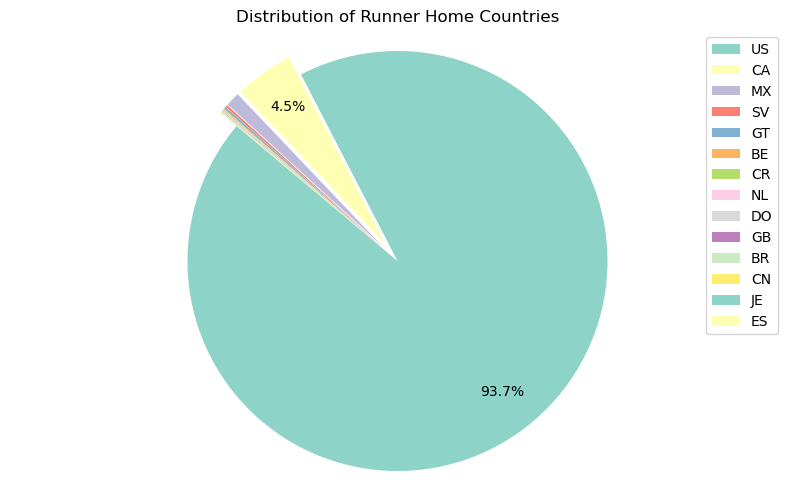

In [187]:
threshold = 0.05

# Create explode list
explode = [0.1 if count / country_value_counts.sum() < threshold else 0 for count in country_value_counts]

#Choose which pieces get percentages

def my_autopct(pct):
    return f'{pct:.1f}%' if pct > 4 else ''



plt.figure(figsize=(10, 6))
country_value_counts.plot(kind='pie', autopct=my_autopct, startangle=140, explode=explode, pctdistance=.80, labels=None, colors= palette)
plt.title('Distribution of Runner Home Countries')
plt.ylabel('')  # Hide y-axis label
plt.legend(country_value_counts.index, loc='best')  # Add legend
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Demographic Analysis:
- What is the gender distribution of participants?
- What are the age demographics of participants, does it vary by gender?
- Which countries are most represented in the race?

In [61]:
# Setting Color palette

import seaborn as sns

palette = sns.color_palette("Set3")

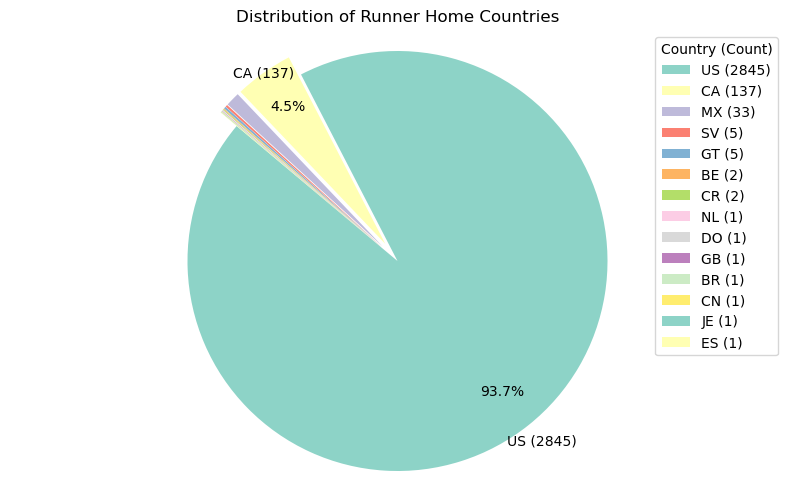

In [62]:
threshold = 0.05

# Create explode list
explode = [0.1 if count / country_value_counts.sum() < threshold else 0 for count in country_value_counts]

# Choose which pieces get percentages
def my_autopct(pct):
    return f'{pct:.1f}%' if pct > 4 else ''

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(country_value_counts, autopct=my_autopct, startangle=140, explode=explode, pctdistance=.80, labels=None, colors= palette)
plt.title('Distribution of Runner Home Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with title
legend_labels = [f'{country} ({count})' for country, count in country_value_counts.items()]
plt.legend(patches, legend_labels, loc='best', title='Country (Count)')

# Add labels for specific countries along with their counts
for i, (country, count) in enumerate(country_value_counts.items()):
    if count > 100:
        # Calculate position for the label
        angle = (patches[i].theta2 + patches[i].theta1) / 2
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))
        distance = 1.1  # Adjust the distance of the label from the center of the pie
        label_position = (x * distance, y * distance)
        
        # Add the label with the count
        plt.text(*label_position, f'{country} ({count})', ha='center', va='center')

plt.show()


In [146]:
df

,Place,Bib,Name,Gender,City,Country,5 Mile,5 Mile\nPace,5 Mile\nPlace,10 Mile,10 Mile\nPace,10 Mile\nPlace,15 Mile,15 Mile\nPace,15 Mile\nPlace,20 Mile,20 Mile\nPace,20 Mile\nPlace,Clock\nTime,Chip\nTime,Pace,Age,Age\nPercentage,Division\nPlace,Division,Finished,State
0,1,2484,MatthewHernandez,M,SAN ANTONIO,US,0 days 00:27:25,0 days 00:05:29,4.0,0 days 00:54:40,0 days 00:05:28,4.0,0 days 01:21:54,0 days 00:05:28,3.0,0 days 01:49:02,0 days 00:05:27,3.0,0 days 02:22:31,0 days 02:22:30,0 days 00:05:26,25.0,85.8,1.0,M Open,1,TEXAS
1,2,2494,AlexanderHelmuth,M,EUGENE,US,0 days 00:26:06,0 days 00:05:13,2.0,0 days 00:52:35,0 days 00:05:16,2.0,0 days 01:19:30,0 days 00:05:18,2.0,0 days 01:48:07,0 days 00:05:24,2.0,0 days 02:22:46,0 days 02:22:45,0 days 00:05:27,24.0,85.6,2.0,M Open,1,OREGON
2,3,2477,PeterBorger,M,MALVERN,US,0 days 00:26:11,0 days 00:05:14,3.0,0 days 00:52:34,0 days 00:05:15,1.0,0 days 01:18:54,0 days 00:05:16,1.0,0 days 01:46:03,0 days 00:05:18,1.0,0 days 02:22:51,0 days 02:22:49,0 days 00:05:27,24.0,85.6,3.0,M Open,1,PENNSYLVANIA
3,4,2419,JoeMaguire,M,PHILADELPHIA,US,0 days 00:27:40,0 days 00:05:32,6.0,0 days 00:55:02,0 days 00:05:30,5.0,0 days 01:22:58,0 days 00:05:32,4.0,0 days 01:50:42,0 days 00:05:32,4.0,0 days 02:23:46,0 days 02:23:44,0 days 00:05:29,26.0,85.0,1.0,M 25-29,1,PENNSYLVANIA
4,5,2411,BlakeMedhaug,M,SEATTLE,US,0 days 00:27:31,0 days 00:05:30,5.0,0 days 00:55:02,0 days 00:05:30,6.0,0 days 01:22:58,0 days 00:05:32,5.0,0 days 01:50:46,0 days 00:05:32,5.0,0 days 02:25:26,0 days 02:25:25,0 days 00:05:33,36.0,84.8,1.0,M 35-39,1,WASHINGTON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,QuinnMichalek,M,EUGENE,US,0 days 00:45:55,0 days 00:09:11,1986.0,0 days 01:31:16,0 days 00:09:08,2015.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,45.0,NaN,NaN,NaN,0,OREGON
3032,3033,5483,deanbooras,M,CONCORD,US,NaT,NaT,NaN,0 days 01:42:17,0 days 00:10:14,2494.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,41.0,NaN,NaN,NaN,0,MISSOURI
3033,3034,2525,JacobWaufle,M,EUGENE,US,0 days 00:43:43,0 days 00:08:45,1645.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,21.0,NaN,NaN,NaN,0,OREGON
3034,3035,2402,HillaryShaw,F,SEATTLE,US,0 days 00:59:40,0 days 00:11:56,2914.0,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaT,40.0,NaN,NaN,NaN,0,WASHINGTON


### Gender

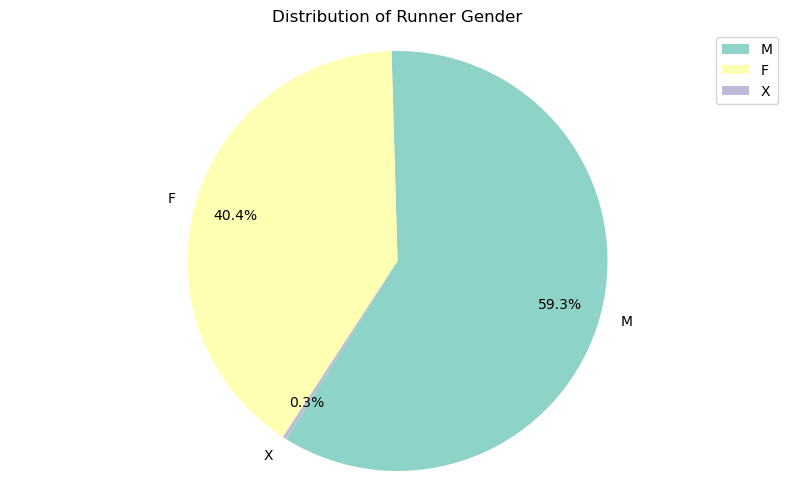

In [201]:


gender_valuecounts=df['Gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_valuecounts.plot(kind='pie', autopct='%1.1f%%', startangle=238, pctdistance=.80, colors=palette)
plt.title('Distribution of Runner Gender')
plt.ylabel('')  # Hide y-axis label
plt.legend(gender_valuecounts.index, loc='best')  # Add legend
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

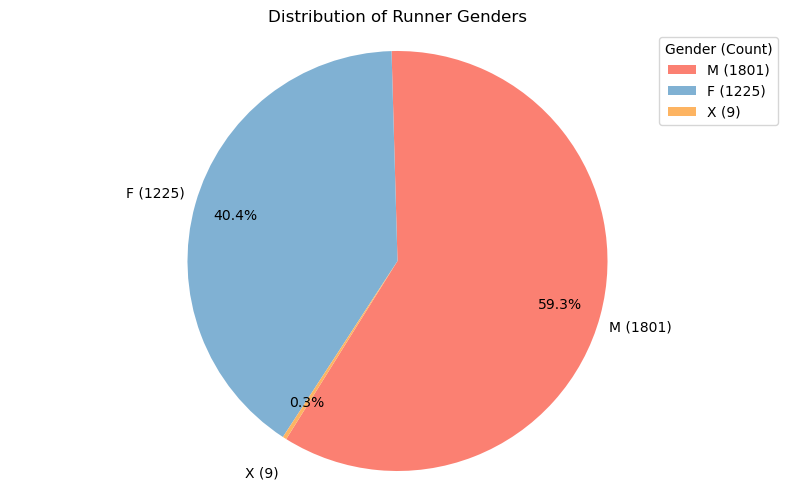

In [63]:
gender_valuecounts=df['Gender'].value_counts()

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(gender_valuecounts, autopct='%1.1f%%', startangle=238, pctdistance=.80, colors=palette[3:6])
plt.title('Distribution of Runner Genders')
plt.ylabel('')  # Hide y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with title
legend_labels = [f'{gender} ({count})' for gender, count in gender_valuecounts.items()]
plt.legend(patches, legend_labels, loc='best', title='Gender (Count)')

# Add labels for specific Genders along with their counts
for i, (gender, count) in enumerate(gender_valuecounts.items()):
    angle = (patches[i].theta2 + patches[i].theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    distance = 1.2 # Adjust the distance of the label from the center of the pie
    label_position = (x * distance, y * distance)
    
    # Add the label with the count
    plt.text(*label_position, f'{gender} ({count})', ha='center', va='center')

plt.show()


In [209]:
age_value_counts = df['Age'].value_counts()

### Age by Gender

<Figure size 1200x600 with 0 Axes>

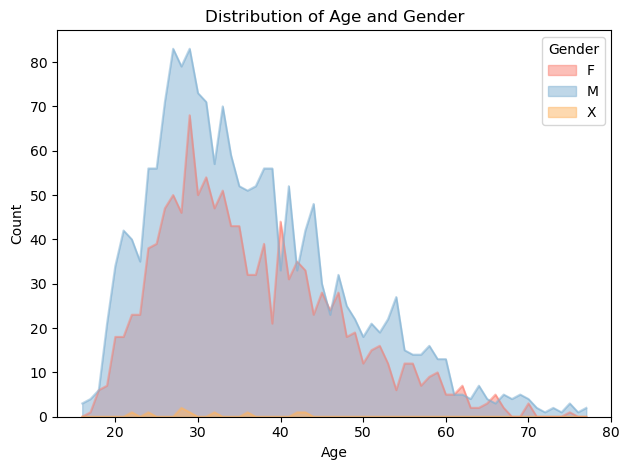

In [103]:
age_gender_counts = df.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

tick_positions = range(0, len(age_gender_counts.index), 5)
tick_labels = age_gender_counts.index[tick_positions]


plt.figure(figsize=(12, 6))  # Adjust the width as needed
age_gender_counts.plot(kind='area', stacked=False,color=palette[3:6])
plt.title('Distribution of Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.xticks(tick_labels, rotation=45, ha='right')  
plt.legend(title='Gender')
plt.tight_layout()  
#plt.show()
plt.savefig('Gender_Age_areaplt.png', dpi=300, bbox_inches='tight')

# Performance Analysis:
- What is the distribution of finishing times?
- Are there any correlations between age and finishing time?
- How does pace vary across different segments of the race?
- Are there any significant differences in performance between genders?

In [86]:
plt.show()

In [95]:
df['hours'] = df['chip_time_delta'].dt.total_seconds() / 3600

In [113]:
df

,Place,Bib,Gender,City,Country,5_Mile,5_Mile_Pace,5_Mile_Place,10_Mile,10_Mile_Pace,10_Mile_Place,15_Mile,15_Mile_Pace,15_Mile_Place,20_Mile,20_Mile_Pace,20_Mile_Place,Clock_Time,Chip_Time,Pace,Age,Age_Percentage,Division_Place,Division,State,chip_time_delta,hours,AgeGroup
0,1,2484,M,SAN ANTONIO,US,27:25,5:29,4.0,54:40,5:28,4.0,1:21:54,5:28,3.0,1:49:02,5:27,3.0,2:22:31,2:22:30,5:26,25.0,85.8,1.0,M Open,TEXAS,0 days 02:22:30,2.38,20s
1,2,2494,M,EUGENE,US,26:06,5:13,2.0,52:35,5:16,2.0,1:19:30,5:18,2.0,1:48:07,5:24,2.0,2:22:46,2:22:45,5:27,24.0,85.6,2.0,M Open,OREGON,0 days 02:22:45,2.38,20s
2,3,2477,M,MALVERN,US,26:11,5:14,3.0,52:34,5:15,1.0,1:18:54,5:16,1.0,1:46:03,5:18,1.0,2:22:51,2:22:49,5:27,24.0,85.6,3.0,M Open,PENNSYLVANIA,0 days 02:22:49,2.38,20s
3,4,2419,M,PHILADELPHIA,US,27:40,5:32,6.0,55:02,5:30,5.0,1:22:58,5:32,4.0,1:50:42,5:32,4.0,2:23:46,2:23:44,5:29,26.0,85.0,1.0,M 25-29,PENNSYLVANIA,0 days 02:23:44,2.40,20s
4,5,2411,M,SEATTLE,US,27:31,5:30,5.0,55:02,5:30,6.0,1:22:58,5:32,5.0,1:50:46,5:32,5.0,2:25:26,2:25:25,5:33,36.0,84.8,1.0,M 35-39,WASHINGTON,0 days 02:25:25,2.42,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,3894,M,EUGENE,US,45:55,9:11,1986.0,1:31:16,9:08,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,OREGON,NaT,NaN,40s
3032,3033,5483,M,CONCORD,US,NaN,NaN,NaN,1:42:17,10:14,2494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,MISSOURI,NaT,NaN,40s
3033,3034,2525,M,EUGENE,US,43:43,8:45,1645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,OREGON,NaT,NaN,20s
3034,3035,2402,F,SEATTLE,US,59:40,11:56,2914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,WASHINGTON,NaT,NaN,40s


In [96]:
df['hours'] = df['hours'].round(2)

In [118]:
decade_bins = [16, 20, 30, 40, 50, 60, 70, 100]  # Define the bin edges for age groups

# Define the labels for the age groups
decade_labels = ['16-19', '20s', '30s', '40s', '50s', '60s', '70+']

df['AgeGroup'] = pd.cut(df['Age'],bins=decade_bins,labels=decade_labels,right=False)


In [99]:
df.drop(columns=['Hours'],inplace=True)

<Figure size 1000x600 with 0 Axes>

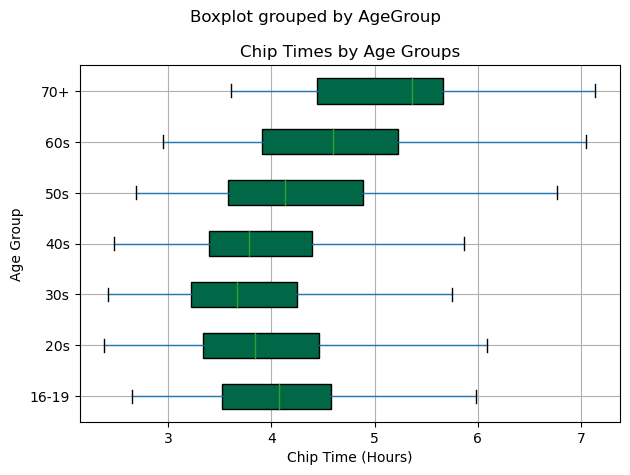

In [119]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import ticker module


# Plot box plots
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='hours', by='AgeGroup', patch_artist=True, vert=False,
                     boxprops=dict(facecolor=(0, 104/255, 71/255)), showfliers=False)

# Customize plot
plt.title('Chip Times by Age Groups')
plt.xlabel('Chip Time (Hours)')
plt.ylabel('Age Group')



plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [46]:
df.loc[df['Gender'] == 'M'].shape

(1723, 28)

In [47]:
1723/2904

0.5933195592286501

In [15]:
df.shape

(2904, 28)

In [43]:
.221787 * 60

13.307220000000001

In [106]:
# Anonymised rows

df.drop(columns=['Name'],inplace=True)

KeyError: "['Name'] not found in axis"

In [ ]:
df['Chip_Time'].

In [11]:
df.to_csv('/Users/mattguymon/Desktop/DataViz Projects/Eugene_Marathon_Results_2024_CLEAN.csv', index=False)

In [1]:
df.loc[df['State'].isnull(),'City'].value_counts().head(60)

NameError: name 'df' is not defined

In [5]:
df = pd.read_csv('/Users/mattguymon/Desktop/DataViz Projects/Eugene_Marathon_Results_2024_CLEAN.csv')

In [8]:
df= df.dropna()